# Analysis of Hotel Reviews, Segmentation       and   Developing a Recommender System

## Business Case

Tourism is a huge industry, hotels are the foundations of this industry. Hotels are also opted for business conferences, family functions, to conduct events of major industries, especially automobile industry etc. When considering the major business to the hotel, it is the tourism sector which contributes the most. With the technological advancement distant destinations have come closer. Customers travelling, need not worry about the uncertainities they face at hotels in a unknown place anymore. Travel,hotel applications, which show the photos of the rooms, reviews written about the hotel are readily available. Customers can decide easily which hotel to choose according to reviews,ratings. These user ratings help the hotel management to improve their services to attract more business.
Analysis of the customer opinion and ratings is extremely important to both the hotel management and customers, management for they can decide on the services,offers,pricing occupancy,profitability and customers can have a large choice to choose from, according to their requirements.

## Machine Learning Problem Statement

With millions of hotel reviews and hundreds of reviews per hotel, it becomes vital to provide the best information to customers in an easy 
to consume way, also the best analysis to the management. The reviews 
given by the customers should be sybjected to text analysis using natural language processing (NLP) techniques. Exploratory data analysis need to be performed with some visualizations in the process in order to get better 
understanding about the data. Data preprocessing should be carried out before building machine learning models. Sentiment analysis should be done after building machine learning models, metric to be considered is accuracy. Clustering is to be performed on existing hotels data for cluster 
analysis.Finally user rating and new hotels are to be used to perform recommender.

### Data Exploration

__Importing necessary libraries__

In [3]:
import pandas as pd
import numpy as np
import datetime
import scipy
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib import pyplot

In [4]:
import re, io
import spacy
from spacy import displacy
import en_core_web_lg
import textacy
import regex

In [6]:
# Reading the Data

In [7]:
hotel_data = pd.read_csv("Train-1554810061973.csv")
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


In [8]:
# Describing the Data

In [10]:
hotel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6287 entries, 0 to 6286
Data columns (total 6 columns):
Reviewid      6287 non-null object
Hotelid       6287 non-null object
userid        6287 non-null object
Date          6287 non-null object
reviewtext    6287 non-null object
Sentiment     6287 non-null object
dtypes: object(6)
memory usage: 294.8+ KB


In [9]:
hotel_data.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
Sentiment     object
dtype: object

In [10]:
hotel_data.Sentiment = hotel_data.Sentiment.astype('category')

The train data has 6287 rows and 6 columns "Reviewid, Hotelid, userid, Date, reviewtext, Sentiment" all of them are categorical type data.

In [18]:
# Changing the data type of the date column from object to datetime

In [19]:
hotel_data['Date'] =  pd.to_datetime(hotel_data['Date'],format='%b %d, %Y')

In [20]:
hotel_data.dtypes

Reviewid              object
Hotelid               object
userid                object
Date          datetime64[ns]
reviewtext            object
Sentiment             object
word_count             int64
char_count             int64
dtype: object

The date column has been changed to datetime type

In [21]:
# Creating New columns

In [22]:
hotel_data["Day"] = hotel_data.Date.apply(lambda row:row.day)

In [23]:
hotel_data["Month"] = hotel_data.Date.apply(lambda row:row.month)

In [24]:
hotel_data["Year"] = hotel_data.Date.apply(lambda row:row.year)

In [25]:
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,word_count,char_count,Day,Month,Year
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,14,43,16,11,2007
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,226,1170,30,10,2007
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,128,668,12,10,2007
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,640,3529,31,8,2007
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,206,1143,18,7,2007


Three new columns have been formed by extracting day, month and year from datetime column. These columns are in the numerical type, they need to be changed to categorical 

In [26]:
# Changing the data type of  Day, Month, Year to string 

In [27]:
hotel_data['Day'] = hotel_data['Day'].astype('category')
hotel_data['Month'] = hotel_data['Month'].astype('category')
hotel_data['Year'] = hotel_data['Year'].astype('category')

In [28]:
hotel_data.dtypes

Reviewid              object
Hotelid               object
userid                object
Date          datetime64[ns]
reviewtext            object
Sentiment             object
word_count             int64
char_count             int64
Day                 category
Month               category
Year                category
dtype: object

All the three columns have been converted to categorical type

In [29]:
# Checking for number of unique Hotels
len(hotel_data.Hotelid.unique())

100

There are a total 100 unique hotels in the data.

In [30]:
# Checking for total number of unique user id
len(hotel_data.userid.unique())

6100

There are total 6100 unique user id

In [31]:
# Checking for the Sentiment counts in the Sentiment column
hotel_data['Sentiment'].value_counts()

good         3213
excellent    1971
bad          1103
Name: Sentiment, dtype: int64

In [ ]:
# Plotting Sentiment counts

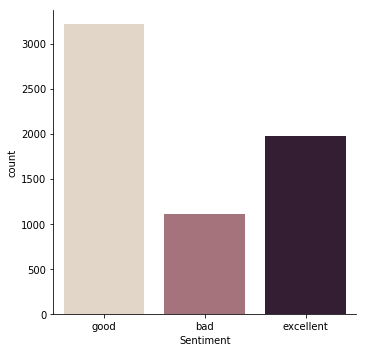

In [32]:
sns.catplot(x="Sentiment", kind="count", palette="ch:.25", data=hotel_data);

Some insights provided by the above Plot is the distribution of the count of Sentiments

Good reviews are the highest, good can be safely considered average rating, leaving scope for some unhappiness to the user

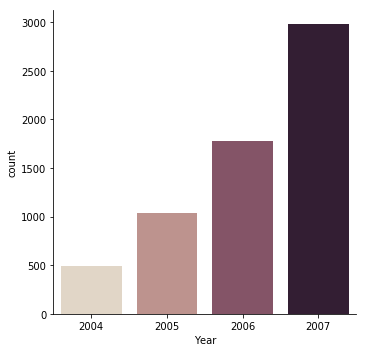

In [33]:
# Distribution of number of reviews according to year
sns.catplot(x="Year", kind="count", palette="ch:.25", data=hotel_data)

Insights provided by the plot above is distribution of the total Reviews according to Year

Number of travellers is increasing every year

Number of travellers giving feedback also has increased¶

Number of travellers prefering online method over the conventional methods for booking hotels

In [ ]:
# Calculating total number of Reviews for each Hotel ID in descending order

In [34]:
hotel_data.Hotelid.value_counts(ascending=False).head(10)

hotel_188    521
hotel_147    203
hotel_152    194
hotel_182    183
hotel_169    174
hotel_200    159
hotel_186    159
hotel_189    157
hotel_143    152
hotel_135    139
Name: Hotelid, dtype: int64

Text(0.5, 1.0, 'Top 10 Hotels which got highest reviews')

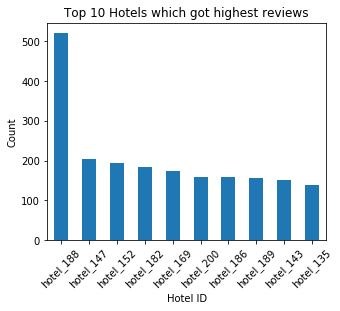

In [35]:
# Let's look at the top 10 reviewed Hotels
Hotel_Name_count = hotel_data.Hotelid.value_counts()
Hotel_Name_count[:10].plot(kind='bar',figsize=(5,4),rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Top 10 Hotels which got highest reviews')

In the plot above we see the most popular or highly visited hotels

Hotel with hotel id hotel_188 has the highest customers followed by hotel_147

In [36]:
#Ch ecking the hotels which recieved excellent rating
hotel_data[hotel_data.Sentiment == 'excellent']["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    239
hotel_147    106
hotel_200    103
hotel_186     87
hotel_189     78
hotel_135     65
hotel_146     55
hotel_181     55
hotel_169     51
hotel_115     48
Name: Hotelid, dtype: int64

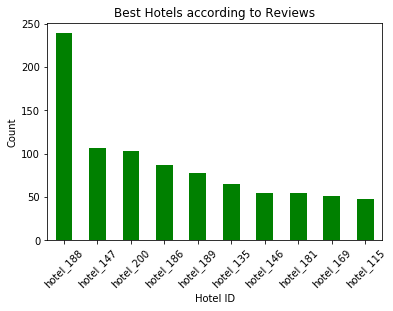

In [37]:
# Plotting the hotels which recieved excellent rating
best_hotels = hotel_data[hotel_data.Sentiment == 'excellent']["Hotelid"].value_counts(ascending=False).head(10)
best_hotels.plot(kind="bar",color = "Green",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Best Hotels according to Reviews')
plt.show()

Hotels with hotel id hotel_188 and hotel_147 have got the highest excellent ratings in the reviews.

Hotel with hotel_id hotel_200 has third highest excellent ratings

In [38]:
# Checking the hotels which recieved good rating
hotel_data[hotel_data.Sentiment == 'good']["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    244
hotel_182    106
hotel_152     96
hotel_147     89
hotel_141     85
hotel_143     84
hotel_118     78
hotel_169     75
hotel_150     72
hotel_181     68
Name: Hotelid, dtype: int64

In [ ]:
# Plotting the hotels which recieved excellent rating

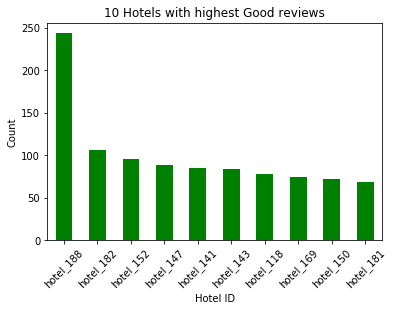

In [39]:
# Average reviewes for Hotels
avg_hotels = hotel_data[hotel_data.Sentiment == 'good']["Hotelid"].value_counts(ascending=False).head(10)
avg_hotels.plot(kind="bar",color = "Green",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with highest Good reviews')
plt.show()

Hotel with hotel id hotel_188 has the highest good ratings

Hotel with hotel id hotel_182 has less excellent ratings but second highest good ratings, lot of scope for improvement

Hotel with hotel id hotel_147 is in the top 10 list

Hotel with hotel id hotel_200 is in the top 50 list

In [40]:
# Checking the hotels which recieved bad rating
hotel_data[hotel_data.Sentiment == 'bad']["Hotelid"].value_counts(ascending=False).head(10)

hotel_152    54
hotel_169    48
hotel_182    39
hotel_127    38
hotel_188    38
hotel_134    36
hotel_150    25
hotel_118    23
hotel_148    23
hotel_143    23
Name: Hotelid, dtype: int64

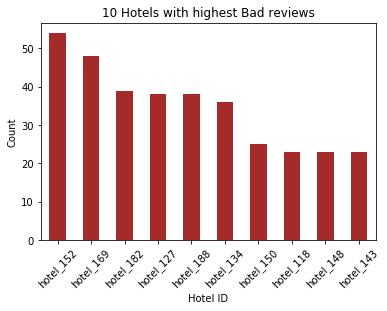

In [41]:
# Plotting the hotels which recieved bad rating
bad_hotels =hotel_data[hotel_data.Sentiment == 'bad']["Hotelid"].value_counts(ascending=False).head(10)
bad_hotels.plot(kind="bar",color="brown",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with highest Bad reviews')
plt.show()

Overall the bad ratings are less compared to excellent and good ratings

Hotel with hotel id hotel_188 does appear with significant number of bad ratings

Hotel with hotel id hotel_200 does not appear in this list

In [43]:
# Checking the total count of both Good and Bad reviews for each Hotel, which needs Hotelier's attention
hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'bad')]["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    282
hotel_152    150
hotel_182    145
hotel_169    123
hotel_143    107
hotel_141    102
hotel_118    101
hotel_150     97
hotel_147     97
hotel_127     94
Name: Hotelid, dtype: int64

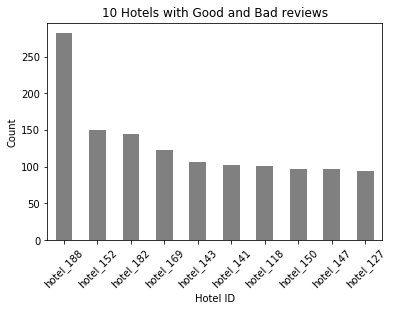

In [44]:
# Plotting the total count of both Good and Bad reviews for each Hotel
good_bad_hotels =hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'bad')]["Hotelid"].value_counts(ascending=False).head(10)
good_bad_hotels.plot(kind="bar",color="gray",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with Good and Bad reviews')
plt.show()

The hotels in this list have a lot of improvement to do. considering good as average rating

In [46]:
# Checking the total count of both Good and Excellent reviews for each Hotel
hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'excellent')]["Hotelid"].value_counts(ascending=False).head(10)

hotel_188    483
hotel_147    195
hotel_200    153
hotel_186    153
hotel_182    144
hotel_189    142
hotel_152    140
hotel_135    130
hotel_143    129
hotel_169    126
Name: Hotelid, dtype: int64

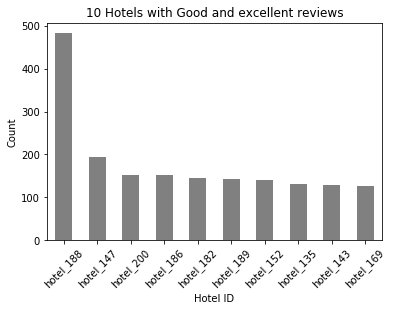

In [47]:
# Plotting the total count of both Good and Excellent reviews for each Hotel
good_exc_hotels =hotel_data[(hotel_data.Sentiment == 'good') |(hotel_data.Sentiment == 'excellent')]["Hotelid"].value_counts(ascending=False).head(10)
good_exc_hotels.plot(kind="bar",color="gray",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('10 Hotels with Good and excellent reviews')
plt.show()

Hotel with hotel id hotel_200 is present in this list, but has got very less bad reviews overall the BEST PERFORMING HOTEL

In [48]:
# Checking the distribution of Sentiment for each hotel
hotel_data.groupby(['Hotelid','Sentiment']).count()

Reviewid  userid  Date  reviewtext  word_count  \
Hotelid   Sentiment                                                   
hotel_101 bad               5       5     5           5           5   
          excellent         6       6     6           6           6   
          good             15      15    15          15          15   
hotel_102 bad               6       6     6           6           6   
          excellent        20      20    20          20          20   
          good             37      37    37          37          37   
hotel_103 bad               8       8     8           8           8   
          excellent        18      18    18          18          18   
          good             20      20    20          20          20   
hotel_104 bad              10      10    10          10          10   
          excellent        11      11    11          11          11   
          good             26      26    26          26          26   
hotel_105 bad               6       6     6           6           6   
          excellent         7       7     7           7           7   
          good             17      17    17          17          17   
hotel_106 bad               6       6     6           6           6   
          excellent         7       7     7           7           7   
          good             18      18    18          18          18   
hotel_107 bad               3       3     3           3           3   
          excellent         5       5     5           5           5   
          good             10      10    10          10          10   
hotel_108 bad               4       4     4           4           4   
          good              5       5     5           5           5   
hotel_109 bad               2       2     2           2           2   
          excellent         1       1     1           1           1   
          good              8       8     8           8           8   
hotel_110 bad               6       6     6           6           6   
          excellent         2       2     2           2           2   
          good             21      21    21          21          21   
hotel_111 bad              12      12    12          12          12   
...                       ...     ...   ...         ...         ...   
hotel_190 bad               9       9     9           9           9   
          excellent         9       9     9           9           9   
          good             16      16    16          16          16   
hotel_191 excellent         9       9     9           9           9   
          good             16      16    16          16          16   
hotel_192 bad               2       2     2           2           2   
          excellent         2       2     2           2           2   
          good              8       8     8           8           8   
hotel_193 bad               6       6     6           6           6   
          excellent         1       1     1           1           1   
          good              5       5     5           5           5   
hotel_194 bad              12      12    12          12          12   
          excellent        16      16    16          16          16   
          good             56      56    56          56          56   
hotel_195 bad               4       4     4           4           4   
          good              7       7     7           7           7   
hotel_196 bad              13      13    13          13          13   
          good              4       4     4           4           4   
hotel_197 bad              10      10    10          10          10   
          excellent         1       1     1           1           1   
          good             11      11    11          11          11   
hotel_198 bad               5       5     5           5           5   
          excellent         2       2     2           2           2   
          good             17      17    17  

This data gives the complete distribution of all the columns with sentiment and hotel id

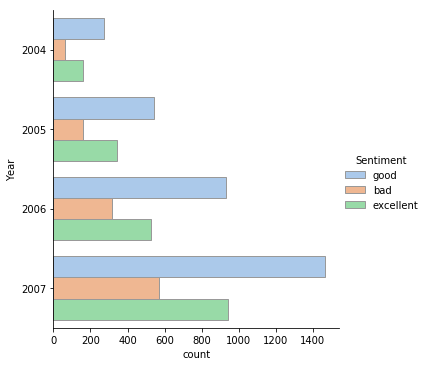

In [49]:
# Plotting distribution of reviews per year categorized according to Sentiment
sns.catplot(y="Year", hue="Sentiment", kind="count",
            palette="pastel", edgecolor=".6",
            data=hotel_data);

Regardless of the sentiment the customers have showed, the general trend is people travelling to other places is increasing year on year.

Regarding the sentiment over the years customers are not straight forward in conveying their opinions, needs a 'Feel free to share opinion honestly' campaign.

In [50]:
# Checking the total Word Count in reviews for each hotel
print("Total Word Count in Reviews")
hotel_data.groupby('Hotelid').apply(lambda x: x.reviewtext.apply(lambda x: len(x.split())).sum())

Total Word Count in Reviews


Hotelid
hotel_101     3510
hotel_102    12147
hotel_103     7997
hotel_104    13283
hotel_105     4208
hotel_106     4636
hotel_107     2345
hotel_108      828
hotel_109     1815
hotel_110     3621
hotel_111     3291
hotel_112     3008
hotel_113     2570
hotel_114     2827
hotel_115    14042
hotel_116     2441
hotel_117     2464
hotel_118    31467
hotel_119     2213
hotel_120     8316
hotel_121     1014
hotel_122     6385
hotel_123    16150
hotel_124     3585
hotel_125       21
hotel_126     5481
hotel_127    23499
hotel_128     9256
hotel_129     6263
hotel_130    23793
             ...  
hotel_171    12212
hotel_172     6928
hotel_173    12817
hotel_174     2880
hotel_175    13324
hotel_176     8214
hotel_177    14827
hotel_178     5333
hotel_179     2931
hotel_180     4757
hotel_181    19848
hotel_182    29108
hotel_183      813
hotel_184     3283
hotel_185     2064
hotel_186    24184
hotel_187     3353
hotel_188    85880
hotel_189    27502
hotel_190     4465
hotel_191     2380
hote

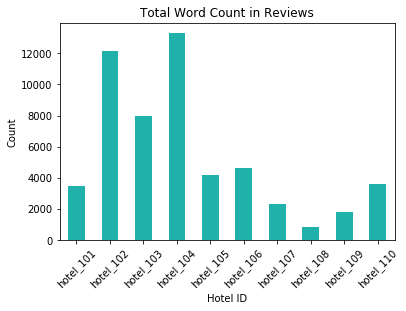

In [51]:
# Plotting the total Word Count in reviews for each hotel
word_count = hotel_data.groupby('Hotelid').apply(lambda x: x.reviewtext.apply(lambda x: len(x.split())).sum()).head(10)
word_count.plot(kind="bar",color="lightseagreen",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Total Word Count in Reviews')
plt.show()

In [52]:
# Lets examine Total review count per hotel
print("Reviews Count")
hotel_data.groupby(['Hotelid'])['reviewtext'].count()

Reviews Count


Hotelid
hotel_101     26
hotel_102     63
hotel_103     46
hotel_104     47
hotel_105     30
hotel_106     31
hotel_107     18
hotel_108      9
hotel_109     11
hotel_110     29
hotel_111     23
hotel_112     25
hotel_113     23
hotel_114     18
hotel_115     62
hotel_116     15
hotel_117     18
hotel_118    134
hotel_119     12
hotel_120     53
hotel_121     15
hotel_122     36
hotel_123    100
hotel_124     22
hotel_125      3
hotel_126     25
hotel_127    122
hotel_128     63
hotel_129     42
hotel_130    130
            ... 
hotel_171     77
hotel_172     41
hotel_173     69
hotel_174     14
hotel_175     70
hotel_176     49
hotel_177     78
hotel_178     26
hotel_179     21
hotel_180     27
hotel_181    133
hotel_182    183
hotel_183      3
hotel_184     14
hotel_185      9
hotel_186    159
hotel_187     28
hotel_188    521
hotel_189    157
hotel_190     34
hotel_191     25
hotel_192     12
hotel_193     12
hotel_194     84
hotel_195     11
hotel_196     17
hotel_197     22
hotel_

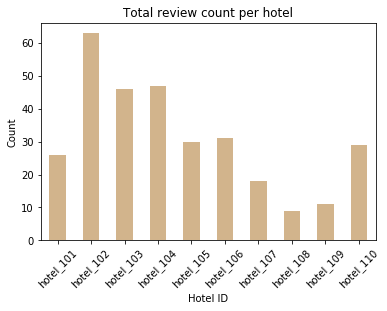

In [53]:
# Plotting total review count per hotel
review_count = hotel_data.groupby(['Hotelid'])['reviewtext'].count().head(10)
review_count.plot(kind="bar",color="tan",rot=45)
plt.xlabel('Hotel ID')
plt.ylabel('Count')
plt.title('Total review count per hotel')
plt.show()

In [54]:
# Let's look at the top 10 dates when highest Reviews were given across different hotels 
hotel_data.Date.value_counts()

2007-05-29    21
2007-08-30    19
2007-08-14    18
2007-08-21    18
2007-08-24    18
2007-09-25    17
2007-10-30    17
2007-04-11    17
2007-03-02    16
2007-07-30    16
2006-10-24    16
2007-12-27    16
2007-10-18    16
2006-09-05    16
2007-08-28    16
2007-07-09    15
2007-09-02    15
2006-10-09    15
2007-12-04    15
2007-11-06    15
2007-08-13    15
2007-07-24    15
2006-08-01    15
2007-08-01    15
2007-10-22    14
2007-07-20    14
2007-11-01    14
2007-04-10    14
2007-08-20    14
2007-08-09    14
              ..
2005-02-04     1
2004-12-18     1
2005-08-18     1
2004-11-16     1
2004-05-28     1
2005-12-16     1
2004-10-18     1
2004-04-26     1
2005-07-21     1
2004-02-10     1
2005-11-23     1
2005-08-27     1
2004-04-12     1
2005-07-26     1
2005-06-30     1
2004-10-04     1
2006-02-10     1
2004-10-27     1
2004-12-20     1
2005-01-01     1
2004-10-20     1
2004-08-22     1
2005-12-30     1
2004-03-28     1
2004-09-25     1
2004-07-12     1
2006-06-15     1
2004-06-25    

Text(0.5, 1.0, 'Top 10 dates when highest Reviews were given')

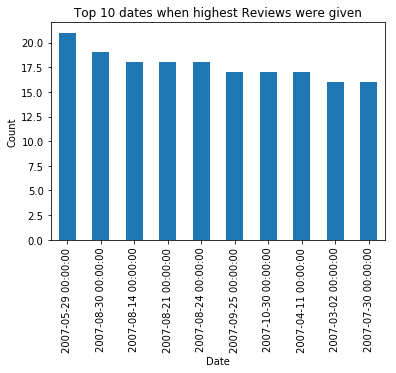

In [55]:
# Plotting the top 10 dates when highest Reviews were given across different hotels
Review_Date_count = hotel_data.Date.value_counts()
Review_Date_count[:10].plot(kind='bar').plot(kind='bar',figsize=(5,4),rot=45)
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Top 10 dates when highest Reviews were given')

In [56]:
# Lets see the frequency of review per user id per hotel
hotel_data.userid.value_counts().head(10)

hotel_4370     4
hotel_8596     3
hotel_5009     3
hotel_8820     3
hotel_6904     3
hotel_10131    3
hotel_6527     3
hotel_7333     3
hotel_10250    3
hotel_7227     3
Name: userid, dtype: int64

Text(0.5, 1.0, 'Frequency of review per user id per hotel')

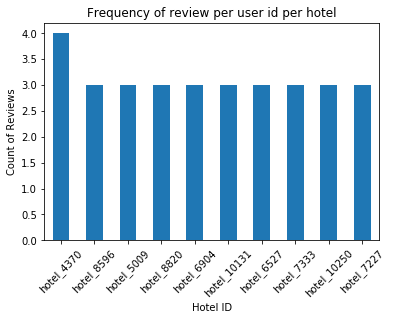

In [57]:
# Plotting the frequency of review per user id per hotel
Reviewers_freq = hotel_data.userid.value_counts()
Reviewers_freq[:10].plot(kind='bar',rot=45,)
plt.xlabel('Hotel ID')
plt.ylabel('Count of Reviews')
plt.title('Frequency of review per user id per hotel')

### Text Analysis using Spacy

In [77]:
# Loading Spacy 

__Loading the libraries related to Spacy__

In [76]:
import string
from spacy.lang.en import English
nlp = spacy.load("en_core_web_lg")
from spacy.lang.en.stop_words import STOP_WORDS
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8

In [59]:
# Creating a new column of the parsed form of reviewtext column
hotel_data['parsed'] = hotel_data.reviewtext.apply(nlp)

In [60]:
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,word_count,char_count,Day,Month,Year,parsed
0,Review_1,hotel_101,hotel_1608,2007-11-16,Nice Marriot View of my king bed room,good,14,43,16,11,2007,"(Nice, Marriot, , View, of, my, king, be..."
1,Review_2,hotel_101,hotel_6939,2007-10-30,"Good hotel, charges for internet access The Ma...",good,226,1170,30,10,2007,"(Good, hotel, ,, charges, for, internet, acces..."
2,Review_3,hotel_101,hotel_3976,2007-10-12,Small but adequate rooms If you have an early ...,good,128,668,12,10,2007,"(Small, but, adequate, rooms, If, you, have, a..."
3,Review_4,hotel_101,hotel_2851,2007-08-31,"Better than average, some noisy rooms I have s...",good,640,3529,31,8,2007,"(Better, than, average, ,, some, noisy, rooms,..."
4,Review_5,hotel_101,hotel_7897,2007-07-18,Ordinary Although it is highly rated in these ...,bad,206,1143,18,7,2007,"(Ordinary, Although, it, is, highly, rated, in..."


The parsed data appears in the new column

In [61]:
# Checking The properties of the parsed column (or tokens) 
dir(hotel_data['parsed'])

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_prepare__',
 '__array_priority__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__long__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 

__Checking for Tokens created by Spacy__

In [62]:
# first token of the review text
hotel_data['parsed'][0]

Nice Marriot       View of my king bed room

In [63]:
# first token of the first review of the review text 
hotel_data['parsed'][0][0]

Nice

In [64]:
# One hundred fifety fifth review of the review text
hotel_data['parsed'][154]

great place great hotel with beautiful golf facilities...we really enjoyed our stay. My wife loved the beach and the spa facilities, The food and the restaurants were the Best in town.For a relaxing vacation or a visit with the family this place has it all. I also saw a wedding celebration at the pool and it seems that they also cater for special events and banquets and groups.we will be back for valentines day and spend another romantic get away..

In [65]:
# first token of the One hundred fifety fifth review of the review text
hotel_data['parsed'][154][0]

great

In [66]:
# last review of the review text  
hotel_data['parsed'][len(hotel_data['parsed'])-1]

Terrific Hotel in the Union Square/Grammercy Park Area The Hotel Giraffe is a very, very good hotel in an area where there are relatively few hotels. The location was just about perfect for my visit--I needed to be near my friends @ the W Union Square. The hotel is immaculately maintained. The lobby is extremely spacious for a relatively small hotel, and the decor/furninshings are tasteful, comfortable, and welcoming. The staff are, for the most part, excellent, though I did encounter one bellman  one maid who were subpar. My room was nicely appointed, and I really enjoyed having a balcony. My room, although not huge, was definitely big enough for needs. I particularly liked the creative  subtle use of color in the decor scheme. This hotel offers some wonderful little perks that many hotels @ this level simply do not--somplimentary continental breakfast, evening wine  cheese, and daily passes to a nearby gym. The lobby has coffee, tea, expresso, juice, and cookies available all day. It

__Checking for sentences__

In [67]:
# List of sentences of the one hundred fifety fifth review 
list(hotel_data['parsed'][154].sents)

[great place great hotel with beautiful golf facilities...,
 we really enjoyed our stay.,
 My wife loved the beach and the spa facilities, The food and the restaurants were the Best in town.,
 For a relaxing vacation or a visit with the family this place has it all.,
 I also saw a wedding celebration at the pool and it seems that they also cater for special events and banquets and groups.we will be back for valentines day and spend another romantic get away..]

__Visualizing the dependencies of tokens__

In [68]:
sentence_spans154 = list(hotel_data['parsed'][154].sents)
options = {"compact": True, "bg": "#FFFFFF",
           "color": "black", "font": "Source Sans Pro"}
displacy.render(sentence_spans154, style="dep", options=options)

The visualization shown above is created using dispalcy, it shows the inter dependence of these tokens 

__Part of Speech Tagging__

In [69]:
# getting all tags for the first review
all_tags = {w.pos: w.pos_ for w in hotel_data['parsed'][0]}
all_tags

{96: 'PROPN', 103: 'SPACE', 85: 'ADP', 90: 'DET', 92: 'NOUN'}

In [70]:
# getting all tags for the nine hundred seventy seventh review
all_tags = {w.pos: w.pos_ for w in hotel_data['parsed'][976]}
all_tags

{96: 'PROPN',
 97: 'PUNCT',
 90: 'DET',
 84: 'ADJ',
 92: 'NOUN',
 95: 'PRON',
 100: 'VERB',
 85: 'ADP',
 93: 'NUM',
 89: 'CCONJ',
 87: 'AUX',
 86: 'ADV',
 94: 'PART',
 91: 'INTJ',
 99: 'SYM'}

In [71]:
# all tags of first sentence of one hundred fifty fifth review
for word in list(hotel_data['parsed'][154].sents)[0]:  
    print(word, word.tag_)

great JJ
place NN
great JJ
hotel NN
with IN
beautiful JJ
golf NN
facilities NNS
... :


In [72]:
# Showing the word and word tag for the third statement of nine hundred seventy seventh review
for word in list(hotel_data['parsed'][976].sents)[2]:  
    print(word, word.tag_)

As IN
a DT
family NN
( -LRB-
my PRP$
husband NN
, ,
myself PRP
and CC
three CD
children NNS
aged VBN
4 CD
, ,
11 CD
and CC
16 CD
) -RRB-
travelling VBG
from IN
Australia NNP
, ,
we PRP
'd MD
just RB
had VBN
3 CD
days NNS
at IN
Disneyland NNP
staying VBG
at IN
a DT
hotel NN
in IN
Anaheim NNP
. .


In [73]:
# Comparing the tags of review 977 and 3457 

In [74]:
review976=hotel_data['parsed'][976]
review976POS = pd.Series(review976.count_by(spacy.attrs.POS))/len(review976)

In [75]:
review3456=hotel_data['parsed'][3456]
review3456POS = pd.Series(review3456.count_by(spacy.attrs.POS))/len(review3456)

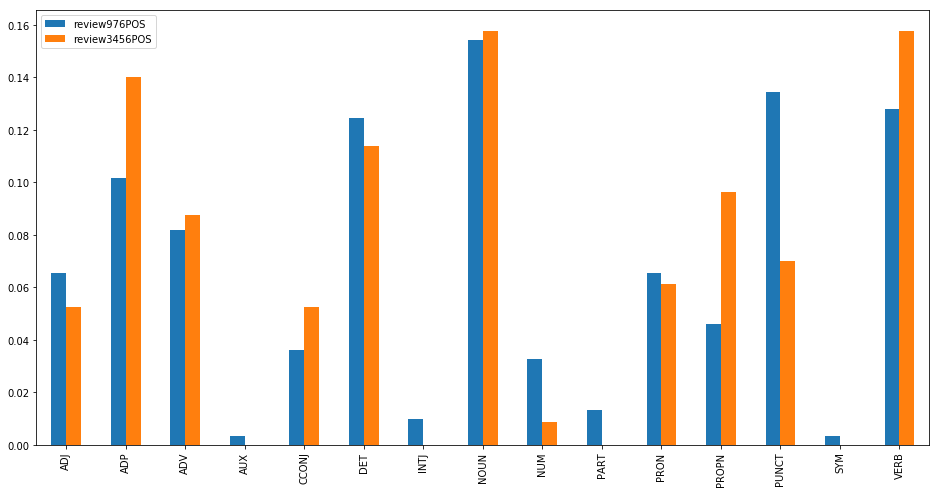

In [78]:
# Plotting the comparison
rcParams['figure.figsize'] = 16, 8
df = pd.DataFrame([review976POS, review3456POS], index=['review976POS', 'review3456POS'])
df.columns = [all_tags[column] for column in df.columns]
df.T.plot(kind='bar')

In [79]:
# Checking basic preprocessing and text cleaning.

In [83]:
# Defining some parameters  
noisy_pos_tags = ['PROP']
min_token_length = 2

In [80]:
# Defining function to check if the token is a noise or not  
def isNoise(token):     
    is_noise = False
    if token.pos_ in noisy_pos_tags:
        is_noise = True 
    elif token.is_stop == True:
        is_noise = True
    elif len(token.string) <= min_token_length:
        is_noise = True
    return is_noise 

In [81]:
def cleanup(token, lower = True):
    if lower:
       token = token.lower()
    return token.strip()

In [84]:
# top unigrams used in the reviews with index 976 
from collections import Counter
cleaned_list = [cleanup(word.string) for word in hotel_data['parsed'][976] if not isNoise(word)]
Counter(cleaned_list) .most_common(20)

[('biltmore', 4),
 ('children', 4),
 ('unfriendly', 3),
 ('hotel', 3),
 ('room', 3),
 ('stayed', 2),
 ('husband', 2),
 ('australia', 2),
 ('anaheim', 2),
 ('extremely', 2),
 ('bar', 2),
 ('friendly', 2),
 ('bananas', 2),
 ('millenium', 1),
 ('place', 1),
 ('july', 1),
 ('12th', 1),
 ('15th', 1),
 ('2006', 1),
 ('family', 1)]

__Entity Detection__

Entity Detection such as person, location, organization, dates, numerals, etc.

In [85]:
# for review with index 976
labels = set([w.label_ for w in hotel_data['parsed'][976].ents]) 
for label in labels: 
    entities = [cleanup(e.string, lower=False) for e in hotel_data['parsed'][976].ents if label==e.label_] 
    entities = list(set(entities)) 
    print(label,entities)

PERSON ['James']
GPE ['Australia', 'Anaheim', 'LA', 'Biltmore', 'US']
ORDINAL ['first']
CARDINAL ['5', 'three']
DATE ['July 12th to the 15th 2006', '3 days', '16', 'the middle of summer', '11', 'aged 4']
ORG ['Millenium Biltmore']
FAC ['Disneyland']
MONEY ['80 cents', 'an extra $10']


In [86]:
# Visualizing the entities in revew with index 976

displacy.render(hotel_data['parsed'][976], style="ent")

__Dependency Parsing__

Depenency parsing is a language processing technique that allows us to determine the meaning of a sentence by analyzing how it’s constructed to determine how the individual words relate to each other.

In [87]:
## Defining a function for searching a particular word
def word_search (sentence, token):
    reviews = [sent for sent in sentence.sents if token in sent.string.lower()]
    swrds = []
    swrds.extend(reviews)
    return swrds

In [88]:
hotel = [sent for sent in hotel_data['parsed'][765].sents if 'hotel' in sent.string.lower()]

In [89]:
# Creating dependency tree
sentence = hotel[2]
for word in sentence:
    print(word, ': ', str(list(word.children)))

The :  []
hotel :  [The]
made :  [hotel, sure, .]
sure :  [located]
that :  []
our :  []
room :  [our]
was :  []
located :  [that, room, was, on, distract]
on :  [floor]
a :  []
non :  []
- :  [non]
business :  [-]
floor :  [a, business]
as :  []
to :  []
not :  []
distract :  [as, to, not, travelers]
the :  []
many :  []
business :  []
travelers :  [the, many, business]
. :  []


__Searching for a given word, in all the reviews it appears__ 

In [90]:
# extracting all review sentences that contains the term - hotel
(hotel_data.parsed.apply(lambda x:word_search(x, 'hotel'))).sort_values(ascending=False)

460     [(My, husband, had, seen, the, resort, on, Gre...
2391    [(In, addition, to, the, usual, fare, that, yo...
152     [(The, hotel, charged, something, like, $, 5, ...
579     [(I, thought, the, water, was, cloudy, in, the...
1153    [(A, Hilton, with, bed, bugs, ..., for, the, p...
1144    [(so, we, justed, walked, out, of, the, hotel,...
3140    [(Loved, the, elegance, of, the, old, hotel, ....
608     [(but, I, have, little, inclination, to, ever,...
4360    [(Day, Two, :, Breakfast, food, at, the, hotel...
5375    [(I, saw, some, great, hotels, right, on, Time...
146     [(Pool, got, crowded, on, weekends, ,, so, we,...
1136    [(The, door, staff, were, courteous, and, poli...
2843    [(Joie, de, Vivre, has, opened, a, new, hotel,...
5820    [(It, turns, out, that, hotels, booked, on, Ho...
5689       [(There, are, many, bars, around, the, hotel)]
90      [(The, only, negative, thing, was, the, outsid...
1787    [(All, of, this, topped, with, the, indifferen...
4979    [(Hote

In [91]:
# Searching for 'restaurant'
(hotel_data.parsed.apply(lambda x:word_search(x, 'restaurant'))).sort_values(ascending=False)

4366    [(When, he, got, to, the, restaurant, area, ,,...
1220    [(There, is, a, restaurant, and, a, separate, ...
1227    [(The, hotel, has, a, restaurant, called, afé,...
5970    [(I, did, not, use, any, of, the, restaurants,...
6259    [(The, hotel, is, in, the, ', Curry, Hill, ', ...
2391    [(The, Marriott, 's, location, is, convenientl...
1673    [(There, is, a, restaurant, on, the, first, fl...
3928    [(We, ate, at, the, hotel, restaurant, one, ev...
6041    [(the, more, mid, -, line, stores, such, as, J...
1165    [(The, buffet, is, so, extensive, that, it, wi...
1439    [(The, Pal, has, a, very, formal, restaurant, ...
4640    [(I, have, never, written, a, letter, of, comp...
740     [(Instead, of, apologizing, for, not, informin...
2903    [(*, Restaurant, downstairs, (, Max, 's, ), ha...
768     [(Marie, in, the, Breeze, restaurant, who, ser...
3952    [(and, you, can, not, walk, beyond, this, part...
5448    [(We, did, not, use, the, restaurant, ,, but, ...
5465    [(It, 

In [92]:
# Searching for 'parking' 
(hotel_data.parsed.apply(lambda x:word_search(x, 'parking'))).sort_values(ascending=False)

5970    [(Parking, is, $, 18, dollars, a, day, for, va...
1220    [(Be, prepared, to, pay, a, daily, parking, fe...
722     [(It, not, made, very, clear, that, parking, i...
5904    [(He, actually, came, DOWN, to, the, parking, ...
579     [(And, they, will, print, your, boarding, pass...
1227    [(Self, Parking, in, one, of, their, two, unde...
4559    [(Oh, yea, ,, the, parking, is, 20, dollars, a...
2391    [(The, normal, rate, for, Thanksgiving, weeken...
1800    [(Other, reviewers, here, have, commented, on,...
3077    [(If, you, must, drive, ,, consider, parking, ...
3869    [(As, a, Marriott, member, ,, I, was, also, of...
5680    [(If, have, a, car, ,, the, valet, parking, he...
3019    [(The, other, negative, ,, to, be, avoided, if...
2441    [(From, the, bellman, to, the, clerk, at, the,...
2086    [(We, also, had, a, rental, car, which, we, we...
2414    [(Small, rooms, ,, good, location, ,, horrible...
2050    [(But, ,, if, I, had, paid, the, high, price, ...
4316    [(If, 

__Checking all adjectives used with a word__

In [93]:
# Define a function to check all adjectives used with a word
def pos_words (sentence, token, ptag):
    sentences = [sent for sent in sentence.sents if token in sent.string]
    pwrds = []
    for sent in sentences: 
        for word in sent: 
            if token in word.string:
                pwrds.extend([child.string.strip() for child in word.children if child.pos_ == ptag])
    return Counter(pwrds).most_common(10)

In [94]:
# Checking all adjectives used with Hotel
(hotel_data.parsed.apply(lambda x:pos_words(x, 'hotel', "ADJ"))).sort_values(ascending=False)

4241                           [(wrong, 1), (Fancier, 1)]
4253                                         [(wrong, 1)]
1334                                         [(wrong, 1)]
4230    [(worst, 1), (whole, 1), (alternative, 1), (be...
3990                          [(worst, 1), (terrible, 1)]
4592                           [(worst, 1), (regular, 1)]
4768                             [(worst, 1), (large, 1)]
3754                                         [(worst, 1)]
2921                                         [(worst, 1)]
157                                          [(worst, 1)]
149                                          [(worst, 1)]
6006                                         [(worst, 1)]
2761                                         [(worst, 1)]
2753                                         [(worst, 1)]
1703                                         [(worst, 1)]
1344                                         [(worst, 1)]
1337                                         [(worst, 1)]
1387          

In [95]:
# Checking all adjectives used with Restaurant
(hotel_data.parsed.apply(lambda x:pos_words(x, 'restaurant', "ADJ"))).sort_values(ascending=False)

3396              [(wonderful, 1), (full, 1)]
854            [(wonderful, 1), (Spanish, 1)]
2682           [(wonderful, 1), (Chinese, 1)]
6162                         [(wonderful, 1)]
1522                         [(wonderful, 1)]
948                          [(wonderful, 1)]
4651                         [(wonderful, 1)]
1456                         [(wonderful, 1)]
2787                         [(wonderful, 1)]
3794                         [(wonderful, 1)]
2292                         [(wonderful, 1)]
576                          [(wonderful, 1)]
625     [(western, 1), (many, 1), (great, 1)]
506                            [(western, 1)]
2781             [(vegetarian, 1), (good, 1)]
2791                        [(vegetarian, 1)]
2795                        [(vegetarian, 1)]
2782                             [(vegan, 1)]
2840                             [(vegan, 1)]
2575         [(various, 1), (inexpensive, 1)]
3952                           [(various, 1)]
4815                           [(v

In [96]:
# Checking all adjectives used with Parking
(hotel_data.parsed.apply(lambda x:pos_words(x, 'parking', "ADJ"))).sort_values(ascending=False)

3107                                            [(up, 1)]
6029                                   [(unprotected, 1)]
1764                                   [(underground, 1)]
4161                                         [(total, 1)]
3519                                    [(supervised, 1)]
17                                          [(secure, 1)]
2776                               [(safe, 1), (free, 1)]
1400                                       [(regular, 1)]
2665    [(reasonable, 1), (quiet, 1), (safe, 1), (free...
2745                              [(quiet, 1), (free, 1)]
2835                                         [(quick, 1)]
2866                                        [(public, 1)]
1538                                        [(public, 1)]
229                                         [(public, 1)]
2911                                        [(public, 1)]
3505                                        [(public, 1)]
4344                                         [(pricy, 1)]
771           

In [97]:
# Checking all adjectives used with Bathroom
(hotel_data.parsed.apply(lambda x:pos_words(x, 'bathroom', "ADJ"))).sort_values(ascending=False)

4194    [(wonderful, 1), (large, 1), (separate, 1)]
4280                      [(whole, 1), (entire, 1)]
2272                                   [(white, 1)]
3332                                   [(weird, 1)]
569                                 [(upstairs, 1)]
2733                                [(unheated, 1)]
3364                                    [(ugly, 1)]
218                                     [(tiny, 1)]
5332                                    [(tiny, 1)]
42                                      [(tiny, 1)]
4852                                    [(tiny, 1)]
1449                                    [(tiny, 1)]
1004                                    [(tiny, 1)]
2009                                    [(tiny, 1)]
4527                                    [(tiny, 1)]
3317                                    [(tiny, 1)]
1524                                    [(tiny, 1)]
5372                                    [(tiny, 1)]
4505                                    [(tiny, 1)]
2065        

In [98]:
# Checking all adjectives used with Internet
(hotel_data.parsed.apply(lambda x:pos_words(x, 'internet', "ADJ"))).sort_values(ascending=False)

5038    [(wireless, 1), (wired, 1)]
221                 [(wireless, 1)]
5729                [(wireless, 1)]
4332                [(wireless, 1)]
5899                [(wireless, 1)]
2259                [(wireless, 1)]
2632                [(wireless, 1)]
505                 [(wireless, 1)]
2036                [(wireless, 1)]
2787                [(wireless, 1)]
121                 [(wireless, 1)]
5190                [(wireless, 1)]
4546                [(wireless, 1)]
5967                [(wireless, 1)]
2297                [(wireless, 1)]
955                 [(wireless, 1)]
3279                [(wireless, 1)]
5305                [(wireless, 1)]
2489                [(wireless, 1)]
3315                [(wireless, 1)]
635                 [(wireless, 1)]
4886                [(wireless, 1)]
6014                [(wireless, 1)]
2104                [(wireless, 1)]
2520                [(wireless, 1)]
3376                [(wireless, 1)]
1940                [(wireless, 1)]
3363                [(wirele

In [99]:
# Checking all adjectives used with Staff
(hotel_data.parsed.apply(lambda x:pos_words(x, 'staff', "ADJ"))).sort_values(ascending=False)

4601      [(worst, 1), (incompetent, 1)]
6279      [(wonderful, 1), (helpful, 1)]
6187        [(wonderful, 1), (front, 1)]
2527     [(wonderful, 1), (excelent, 1)]
1507         [(wonderful, 1), (best, 1)]
1438                    [(wonderful, 1)]
2912                    [(wonderful, 1)]
4563                    [(wonderful, 1)]
4989                    [(wonderful, 1)]
1092                    [(wonderful, 1)]
3799                    [(wonderful, 1)]
1799                    [(wonderful, 1)]
1911                    [(wonderful, 1)]
4401                        [(whole, 1)]
1537                        [(whole, 1)]
5172                        [(whole, 1)]
786                         [(whole, 1)]
6182          [(well!The, 1), (nice, 1)]
1439                         [(warm, 1)]
6259                         [(warm, 1)]
454                          [(warm, 1)]
5548                   [(unpleasant, 1)]
4502         [(unhelpful, 1), (most, 1)]
849                     [(unhelpful, 1)]
3980            

__Dependencies on Noun Phrases__

In [100]:
# Checking the dependencies for nine hundred seventy seventh review 
for chunk in hotel_data['parsed'][976].noun_chunks:
    print(chunk.text, chunk.root.text, chunk.root.dep_,chunk.root.head.text)

Millenium Biltmore Biltmore ROOT Biltmore
an unfriendly place place appos Biltmore
We We nsubj stayed
the Biltmore Biltmore pobj at
July 12th 12th pobj from
a family family pobj As
my husband husband nsubj aged
myself myself appos husband
three children children conj myself
Australia Australia pobj from
we we nsubj had
3 days days dobj had
Disneyland Disneyland pobj at
a hotel hotel pobj at
Anaheim Anaheim pobj in
we we nsubj moved
Anaheim Anaheim pobj from
the Biltmore Biltmore pobj to
I I nsubj felt
we we nsubj fit
The ladies ladies nsubj were
reception reception pobj at
we we nsubj asked
them them dative asked
a question question dobj asked
it it nsubjpass answered
My husband husband nsubj had
I I conj husband
a drink drink dobj had
the gallery bar bar pobj in
the children children nsubj were
the room room pobj in
TV TV dobj watching
the barman barman nsubj was
The concierge concierge nsubj made
a wonderful man man appos concierge
the unfriendly staff staff pobj for
his charming and

In [101]:
# Visualizing the dependencies for nine hundred seventy seventh review 
displacy.render(hotel_data['parsed'][976], style="dep", jupyter= True)

__Word Vector Representation__

In [102]:
parking = nlp(u'parking')

In [103]:
# Word Vector for 'Parking'
print(parking.vector.shape)
print(parking.vector)

(300,)
[ 9.0726e-01 -7.1584e-02  1.0164e-01 -5.3527e-01  2.4844e-01  1.0670e-01
  4.0490e-02 -4.6550e-01 -6.6496e-01  2.5296e+00 -1.0674e-01  1.5276e-01
 -4.1519e-01  6.5366e-01 -7.7401e-01 -3.2346e-02 -2.2184e-01  1.8517e+00
  6.1072e-01 -1.1816e-02 -3.1363e-01  2.0808e-01  2.2790e-01 -3.5158e-01
  1.9133e-01 -1.9661e-01 -3.0259e-01 -1.0318e-01  8.0290e-02 -1.0391e-01
  5.6774e-01 -2.6096e-01 -2.2379e-01  1.2302e-01 -3.0347e-01 -1.2316e-01
  2.1627e-01  9.5927e-02 -8.7343e-02  4.1523e-01 -2.9173e-01 -9.9411e-02
  1.5273e-01  5.8515e-01 -7.0793e-01  2.8188e-01 -1.1400e-02 -3.1854e-01
 -6.9463e-01  3.3950e-01 -6.9349e-02 -3.8888e-01  4.7957e-01  1.0263e+00
 -1.5809e-02 -3.1540e-02 -2.4417e-01  2.7012e-01 -3.3988e-01  7.3072e-01
  7.2472e-02 -6.4591e-02  1.0099e-01  4.9397e-02  3.7456e-01  1.5316e-01
 -2.9485e-01 -1.0092e-01  2.3709e-01  8.5263e-01  3.6780e-01 -2.8952e-01
  7.8563e-01 -8.9958e-04 -1.1416e-01 -2.0456e-01  4.6422e-01 -1.0890e-01
  4.7514e-02  3.7252e-01 -1.4855e-01  4.0398

In [104]:
# Word Vector for 'staff'
staff = nlp(u'staff')
print(staff.vector.shape)
print(staff.vector)

(300,)
[-2.1905e-02 -1.8979e-01  3.5553e-01 -6.0816e-02 -5.1906e-01 -8.5889e-02
  8.2746e-02 -4.1862e-01 -8.6533e-02  3.3396e+00 -1.2230e-01 -3.2504e-01
 -1.2398e-01 -2.4626e-01 -1.7028e-01 -2.9082e-01 -1.7384e-01  1.0500e+00
 -6.9664e-02 -2.5740e-01 -1.7421e-02  2.5935e-01 -5.0088e-01 -6.9464e-01
  2.8373e-01  3.5007e-01 -8.3173e-01 -1.3748e-02  1.1615e-01 -5.7075e-01
 -1.0766e-01 -5.5316e-01 -3.2274e-01 -1.3972e-01 -3.2669e-01  2.2268e-01
  1.0579e-01  5.9063e-02 -2.9592e-01 -2.2262e-01  2.7784e-01  1.2793e-01
 -1.1608e-01 -1.2836e-01  1.7406e-01  4.9827e-02  3.0120e-01  5.1857e-01
  1.0837e-01  1.5294e-01  1.1582e-01 -6.7575e-01  5.6531e-01  4.3994e-02
 -3.1774e-01 -8.5299e-02 -2.6841e-01  4.0139e-01 -1.4822e-01  7.0652e-03
  6.2306e-02 -4.9824e-01 -1.5802e-04  1.6307e-01  6.3542e-02  5.5357e-02
 -1.5869e-01  6.1449e-01  2.4444e-01  8.1389e-01  2.5542e-01 -1.9296e-01
  1.9003e-02  3.9785e-01  6.0415e-01  2.6454e-01  4.9568e-01 -2.8938e-01
  1.4809e-01  5.1240e-01  2.0955e-01 -2.3081

### Text Cleaning on train data

In [105]:
# Reading the train data for cleaning and preprocessing

In [106]:
hotel_data = pd.read_csv("Train-1554810061973.csv")
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad


Mojibake (文字化け; IPA: [mod͡ʑibake]) is the garbled text that is the result of text being decoded using an unintended character encoding. The result is a systematic replacement of symbols with completely unrelated ones, often from a different writing system. 

This problem is present in our data because python reads symbols and accents wrong. Hence requires encoding and decoding in correct format

In [107]:
hotel_data.reviewtext=hotel_data.reviewtext.apply(lambda x: str(x).encode("GB2312","ignore").decode("utf-8"))

In [108]:
# Basic Feature Extraction

In [109]:
#  Checking the Number of Words in each review

In [110]:
hotel_data['word_count'] = hotel_data['reviewtext'].apply(lambda x: len(str(x).split(" ")))
hotel_data[['reviewtext','word_count']].head()

,reviewtext,word_count
0,Nice Marriot View of my king bed room,14
1,"Good hotel, charges for internet access The Ma...",226
2,Small but adequate rooms If you have an early ...,128
3,"Better than average, some noisy rooms I have s...",640
4,Ordinary Although it is highly rated in these ...,206


The above data shows the count of the number of words in each review

In [111]:
# Checking the Number of characters in each review

In [112]:
hotel_data['char_count'] = hotel_data['reviewtext'].str.len() ## this also includes spaces
hotel_data[['reviewtext','char_count']].head()

,reviewtext,char_count
0,Nice Marriot View of my king bed room,43
1,"Good hotel, charges for internet access The Ma...",1170
2,Small but adequate rooms If you have an early ...,668
3,"Better than average, some noisy rooms I have s...",3529
4,Ordinary Although it is highly rated in these ...,1143


The above data shows the count of the number of characters in each review

In [113]:
# Checking the Average Word Length

In [114]:
def avg_word(sentence):
  words = sentence.split()
  return (sum(len(word) for word in words)/len(words))

hotel_data['avg_word'] = hotel_data['reviewtext'].apply(lambda x: avg_word(x))
hotel_data[['reviewtext','avg_word']].head()

,reviewtext,avg_word
0,Nice Marriot View of my king bed room,3.750000
1,"Good hotel, charges for internet access The Ma...",4.181416
2,Small but adequate rooms If you have an early ...,4.226562
3,"Better than average, some noisy rooms I have s...",4.515625
4,Ordinary Although it is highly rated in these ...,4.553398


In [115]:
# Checking the Number of stopwords

In [116]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

In [117]:
hotel_data['stopwords'] = hotel_data['reviewtext'].apply(lambda x: len([x for x in x.split() if x in stop]))
hotel_data[['reviewtext','stopwords']].head()

,reviewtext,stopwords
0,Nice Marriot View of my king bed room,2
1,"Good hotel, charges for internet access The Ma...",103
2,Small but adequate rooms If you have an early ...,61
3,"Better than average, some noisy rooms I have s...",290
4,Ordinary Although it is highly rated in these ...,94


In [118]:
# Checking the Number of special characters

In [119]:
hotel_data['hastags'] = hotel_data['reviewtext'].apply(lambda x: len([x for x in x.split() if x.startswith('#')]))
hotel_data[['reviewtext','hastags']].head()

,reviewtext,hastags
0,Nice Marriot View of my king bed room,0
1,"Good hotel, charges for internet access The Ma...",0
2,Small but adequate rooms If you have an early ...,0
3,"Better than average, some noisy rooms I have s...",0
4,Ordinary Although it is highly rated in these ...,0


In [120]:
# Checking the Number of numerics

In [121]:
hotel_data['numerics'] = hotel_data['reviewtext'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))
hotel_data[['reviewtext','numerics']].head()

,reviewtext,numerics
0,Nice Marriot View of my king bed room,0
1,"Good hotel, charges for internet access The Ma...",0
2,Small but adequate rooms If you have an early ...,0
3,"Better than average, some noisy rooms I have s...",3
4,Ordinary Although it is highly rated in these ...,0


In [122]:
# Checking the Number of Uppercase words

In [123]:
hotel_data['upper'] = hotel_data['reviewtext'].apply(lambda x: len([x for x in x.split() if x.isupper()]))
hotel_data[['reviewtext','upper']].head()

,reviewtext,upper
0,Nice Marriot View of my king bed room,0
1,"Good hotel, charges for internet access The Ma...",8
2,Small but adequate rooms If you have an early ...,0
3,"Better than average, some noisy rooms I have s...",20
4,Ordinary Although it is highly rated in these ...,6


In [124]:
hotel_data.head()

,Reviewid,Hotelid,userid,Date,reviewtext,Sentiment,word_count,char_count,avg_word,stopwords,hastags,numerics,upper
0,Review_1,hotel_101,hotel_1608,"Nov 16, 2007",Nice Marriot View of my king bed room,good,14,43,3.750000,2,0,0,0
1,Review_2,hotel_101,hotel_6939,"Oct 30, 2007","Good hotel, charges for internet access The Ma...",good,226,1170,4.181416,103,0,0,8
2,Review_3,hotel_101,hotel_3976,"Oct 12, 2007",Small but adequate rooms If you have an early ...,good,128,668,4.226562,61,0,0,0
3,Review_4,hotel_101,hotel_2851,"Aug 31, 2007","Better than average, some noisy rooms I have s...",good,640,3529,4.515625,290,0,3,20
4,Review_5,hotel_101,hotel_7897,"Jul 18, 2007",Ordinary Although it is highly rated in these ...,bad,206,1143,4.553398,94,0,0,6


### Basic Pre-processing on train data

__Changing the text to Lower case__

In [126]:
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
hotel_data['reviewtext'].head()

0                nice marriot view of my king bed room
1    good hotel, charges for internet access the ma...
2    small but adequate rooms if you have an early ...
3    better than average, some noisy rooms i have s...
4    ordinary although it is highly rated in these ...
Name: reviewtext, dtype: object

__Checking for other languages and translating__

In [128]:
# Arranging the text in the ascending order of word counts
(hotel_data[['reviewtext','word_count','Sentiment']]).sort_values(by='word_count',ascending=True)[0:50]

,reviewtext,word_count,Sentiment
1058,fantastic.,1,excellent
1397,nice!,1,good
4319,good experience,2,excellent
1328,crammed quarters...,2,good
5446,nice safe hotel,3,good
2990,possibly in transition?,3,good
1096,loved the sportsmens!,3,good
5542,great value...great location,3,good
6226,good boutique hotel,3,excellent
3585,loved the york :),4,excellent


Text in languages other than english contains not more than 30 words as seen above.<br>These texts have to be converted to english,Noise in the form of 'showreview...' full..' is present which has to be removed.

__Checking for noise__

In [130]:
(hotel_data.reviewtext.apply(lambda x:re.findall(r"\b[f][u][l][l][']\S+", x))).sort_values(ascending=False)

2325    [full');]
3379    [full');]
1868    [full');]
5987    [full');]
5988    [full');]
1861    [full');]
1860    [full');]
1859    [full');]
1858    [full');]
1857    [full');]
1855    [full');]
1854    [full');]
1364    [full');]
1365    [full');]
1366    [full');]
260     [full');]
2848    [full');]
3378    [full');]
3380    [full');]
4088    [full');]
3381    [full');]
309     [full');]
308     [full');]
307     [full');]
306     [full');]
305     [full');]
5655    [full');]
5654    [full');]
5653    [full');]
5652    [full');]
          ...    
4195           []
4196           []
4197           []
4198           []
4199           []
4179           []
4177           []
4155           []
4165           []
4156           []
4157           []
4158           []
4159           []
4160           []
4161           []
4162           []
4163           []
4164           []
4166           []
4176           []
4167           []
4168           []
4169           []
4170           []
4171      

In [131]:
(hotel_data.reviewtext.apply(lambda x:re.findall(r"\b[s][h][o][w][r]\S+", x))).sort_values(ascending=False)

3381    [showreview(8885660,]
3702    [showreview(8874952,]
88      [showreview(8687687,]
4612    [showreview(8686501,]
3458    [showreview(8664871,]
1860    [showreview(8588808,]
5651    [showreview(8575967,]
4747    [showreview(8550546,]
2325    [showreview(8548885,]
3857    [showreview(8509018,]
5652    [showreview(8508149,]
5653    [showreview(8465592,]
4613    [showreview(8433798,]
211     [showreview(8419888,]
707     [showreview(8368843,]
4343    [showreview(8276390,]
5654    [showreview(8275004,]
3460    [showreview(8268464,]
3247    [showreview(7956270,]
2223    [showreview(7816679,]
2326    [showreview(7807724,]
3612    [showreview(7723224,]
2411    [showreview(7695502,]
3296    [showreview(7638252,]
5655    [showreview(7595503,]
6127    [showreview(7483438,]
5656    [showreview(7474937,]
702     [showreview(7428843,]
5657    [showreview(7308072,]
1861    [showreview(7304612,]
                ...          
4195                       []
4196                       []
4197      

All the reviews seen above contain noise which has to be removed 

__Replacing the noise with nothing__

In [134]:
hotel_data.reviewtext=hotel_data.reviewtext.apply(lambda x:re.sub(r"\b[f][u][l][l][']\S+","", x))

In [135]:
hotel_data.reviewtext=hotel_data.reviewtext.apply(lambda x:re.sub(r"\b[s][h][o][w][r]\S+","", x))

In [136]:
# Checking for noise after removal
hotel_data.reviewtext[211]

"muy bien  '"

__Translating the languages other than english to english using py_translator__

__Replacing the translated text in place of the original text.__

In [137]:
from py_translator import Translator

In [138]:
# All the indices of the reviewtext column which contain languages other than english
noise_indices=[5661,2959,3858,2410,5652,1860,5655,5656,1857,88,211,3460,3458,2958,4343,5658,3296,2751,3247,3856,5662,2411,4747,
               2326,5650,1858,2749,4613,1868,2957,3381,843,3854,3857,4142,4612,6127,5660,5653,707,5657,2325,2282,3612,3610,1856,
               4566,2410,1575,2547,1815,1861,2960,5646,4085,4086,1078,1516,269,5664,4930,4087,2223,1859,6126,2548,3611,5649,3459,
               4219,5663,3855,4218,3613,1298,5648,5659,4614,2306,2750,2748,741]

In [139]:
# Translate and replace
for i in noise_indices:
    hotel_data.reviewtext.iloc[i]=hotel_data.reviewtext.iloc[i].replace(str(hotel_data.reviewtext.iloc[i]),Translator().translate(text=hotel_data.reviewtext[i], dest='en').text,1)


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [140]:
# Translation done and replaced
hotel_data.reviewtext[4613]

"an average hotel '"

Replacing English contractions in text str with their unshortened forms using Textacy

The “‘d” and “‘s” forms are ambiguous (had/would, is/has/possessive), so are left as-is.

In [141]:

hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x:(textacy.preprocess.unpack_contractions(x)))

__Removing Punctuation__

In [143]:
from bs4 import BeautifulSoup

In [144]:
# Function for cleaning operations
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    #text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub('\s+', ' ', text).strip()
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [145]:
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(clean_text)

__Checking for some common words__

In [148]:
pd.Series(' '.join(hotel_data['reviewtext']).split()).value_counts()[0:50]

the         70436
and         35864
a           31331
to          25959
was         22262
i           17708
in          17473
we          16459
of          14683
hotel       13361
for         13249
is          13017
it          12528
not         11017
room        10568
at           9144
but          8435
were         8341
on           8263
that         8033
you          7711
very         7485
with         7481
this         7373
had          6439
great        6073
there        5978
our          5776
are          5666
have         5517
my           5024
stay         4938
from         4850
they         4809
as           4697
would        4243
so           4100
location     4031
be           3954
all          3933
s            3893
good         3863
if           3685
staff        3671
nice         3543
rooms        3541
one          3266
did          3236
stayed       2995
out          2931
dtype: int64

In [72]:
cust_stop1 = []

SyntaxError: EOL while scanning string literal (<ipython-input-72-e753f6f72d6c>, line 5)

__Removing common words__

In [150]:
com = pd.Series(' '.join(hotel_data['reviewtext']).split()).value_counts()[:10]

In [151]:
com = list(com.index)
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in com))
hotel_data['reviewtext'].head()

0                   nice marriot view my king bed room
1    good charges for internet access marriott airp...
2    small but adequate rooms if you have an early ...
3    better than average some noisy rooms have stay...
4    ordinary although it is highly rated these rev...
Name: reviewtext, dtype: object

__Removing Stop Words__

In [153]:
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
hotel_data['reviewtext'].head()

0                      nice marriot view king bed room
1    good charges internet access marriott airport ...
2    small adequate rooms early morning flight catc...
3    better average noisy rooms stayed times inthe ...
4    ordinary although highly rated reviews pay pre...
Name: reviewtext, dtype: object

__Removing Custom stop words__ 

In [176]:
cust_stop = ['would','one','stayed','us','night','get','also','time','day','could','desk','street','two','others','recently',
            'back','really','front','even','got','free','city','walk','check','go','square','much','non','kept','course','mall',
            'nights','next','around','th','new','first','right','car','san','away','booked','smoking','local','orleans','heard',
            'people','close','bit','found','francisco','morning','times','however','way','union','walking','touch','card','number',
            'though','everything','many','want','door','made','reviews','told','use','went','might','spend','south','studiio','requested',
            'find','minutes','every','take','see','need','etc','staying','lot','another','half','keep','direction','ate','real','quick',
            'asked','make','arrived','said','business','although','blocks','going','always','water','including','whole','finally','wyndham',
            'think','enough','still','days','took','say','family','within','easy','long','reading','westin','along','checking','working',
            'shopping','belvedere','sure','boston','across','hilton','called','block','side','chinatown','arrival','start','five','saw',
            'since','ever','distance','outside','looking','near','early','kids','cable','last','five','saw','provided','worked','maybe',
            'per','three','left','checked','access','husband','valet','downtown','pm','entire','change','daughter','show','style','mini',
            'weekend','open','know','thongs','st','hot','thing','corner','wanted','used','wharf','york','full','road','bart','set','miami'
            'late','sf','work','end','eat','available','looked','given','part','hour','thought','couple','tried','anywhere','ride','comfy',
            'week','came','year','needed','try','plus','call','seemed','lots','especially','several','may','major','french','month','note',
            'without','able','put','look','gave','ask','hyatt','something','evening','probably','minute','line','moved','traveler','glass',
            'nyc','getting','else','less','actually','hear','four','town','nearby','walked','must','give','website','received','nob','name',
            'hill','home','included','busy','district','someone','travel','second','subway','anything','read','cruise','seem','middle','directly',
            'main','everyone','anyone','wife','public','phone','site','tower','slow','la','years','universal','north','everywhere','coming','turn',
            'upon','either','areas','offered','shops','marriott','stop','sheraton','luggage','fisherman','queen','wall','except','beat','done','type',
            'due','rather','cold','yes','ready','later','needs','drive','others','recently','leave','almost','conference','making','machine','previous',
             'decided','fact','closed','entrance','guy','handy','downstairs','california','via','visited','adults','saturday','despite','noticed','+',
             'mptor','particularly','pressure','radisson','compared','opened','throughout','generally','sit','started','items',
             'mention','e','bltimore','simply','sleeping','waited','screen','taken','sent','changed','oh','ones','ordered','hampton','marriot',
             'flat','hair','lines','muni','stuff','embassy','exactly','eggs','added','possible','general','broadway','please',
             'foot','newport','driving','august','running','stars','bright','seeing','catch','train','mid','streets','takes','eating','march','office','third','june',
             'met','company','ilima','matter','sunday','months','didnt','april','obviously','following','ponce','palomar','ny','point','tell','w','july']

In [177]:
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in cust_stop))
hotel_data['reviewtext'].head()

0                              nice view king bed room
1    good charges internet airport seattle reasonab...
2    small adequate rooms flight good choice airpor...
3    better average noisy rooms stay best subsequen...
4    ordinary highly rated pay premium price airpor...
Name: reviewtext, dtype: object

In [157]:
# Checking common words after removal of stop words
pd.Series(' '.join(hotel_data['reviewtext']).split()).value_counts()[:20]

room           10568
great           6073
stay            4938
location        4031
good            3863
staff           3671
nice            3543
rooms           3541
clean           2637
service         2346
place           2051
breakfast       2019
small           1974
area            1843
well            1780
bed             1754
like            1739
friendly        1664
floor           1657
comfortable     1582
dtype: int64

These common words as shown above speak about hotel and sentiments

__Checking for some rare words__

In [158]:
counts_words = pd.Series(' '.join(hotel_data['reviewtext']).split()).value_counts()

In [160]:
counts_words[counts_words<180]

clerk             179
dining            179
budget            177
definately        177
bars              177
transportation    176
cleaned           176
past              176
super             175
fairly            175
dark              175
upgrade           175
negative          174
renovated         174
believe           172
toilet            171
easily            171
chose             171
golf              171
trying            169
directions        169
ended             168
unless            168
twice             168
instead           168
tip               168
larger            167
impressed         167
giraffe           167
dallas            166
                 ... 
edestrian           1
threestar           1
lessor              1
blasted             1
doules              1
festivals           1
instituted          1
airboat             1
ony                 1
coordination        1
fixes               1
grooss              1
lending             1
converts            1
hypoallerg

In [172]:
pd.Series(' '.join(hotel_data['reviewtext']).split()).value_counts()[-3000:]

match           30
cancelled       30
ladies          30
honest          30
concerns        30
expense         30
anymore         30
die             30
changing        30
considered      30
flowers         30
equally         30
eve             30
travels         30
rip             30
connecting      30
poorly          30
depending       30
painted         30
granted         30
fab             30
fell            30
las             30
unbeatable      30
cocktails       30
terribly        30
carry           29
dust            29
skip            29
leisure         29
                ..
bothersome       6
downer           6
electronic       6
nightclubs       6
hiring           6
pampering        6
patios           6
tomorrow         6
saves            6
bathing          6
lite             6
delux            6
numbered         6
pcs              6
pretentious      6
steaks           6
kicker           6
ethnic           6
coloured         6
rinse            6
similarly        6
unreasonable

There are words which occur only once in all the reviews, some occur twice, the list goes on, these do not help in describing sentiment or context.   

__Removing rare words__ 

In [170]:
rare = pd.Series(' '.join(hotel_data['reviewtext']).split()).value_counts()[-3000:]

In [171]:
rare = list(rare.index)
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x: " ".join(x for x in x.split() if x not in rare))
hotel_data['reviewtext'].head()

0                      nice marriot view king bed room
1    good charges internet airport seattle reasonab...
2    small adequate rooms flight good choice airpor...
3    better average noisy rooms stay best subsequen...
4    ordinary highly rated pay premium price airpor...
Name: reviewtext, dtype: object

In [178]:
hotel_data['reviewtext'][0]

'nice view king bed room'

__Lemmatization__

In [179]:
from textblob import Word

In [180]:
hotel_data['reviewtext'] = hotel_data['reviewtext'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
hotel_data['reviewtext'].head(50)

0                               nice view king bed room
1     good charge internet airport seattle reasonabl...
2     small adequate room flight good choice airport...
3     better average noisy room stay best subsequent...
4     ordinary highly rated pay premium price airpor...
5     awesome flight wow suprise property child fast...
6     good stay spent airport shuttle run min room c...
7     great staff overnight flying problem leaving a...
8     fine choice lobby attractive small noisy room ...
9     great value nice expensive nice service great ...
10    nice expensive parking nicely renovated modern...
11    happy stay property gotten rave sleep bed tire...
12    nickel death nice conveniently located flying ...
13    positive staff expecting airport work firm gon...
14    birthday party fun birthday friend loved room ...
15    excellent stay excellent stay room concierge f...
16    great trip somewhat dated room nice remodeled ...
17    sleep park fly parked suv ft lobby light s

In [181]:
# Checking for N grams. 
# Selecting 3 grams would be better for understanding the context

In [361]:
TextBlob(hotel_data['reviewtext'][56]).ngrams(3)

[WordList(['lovely', 'hip', 'great']),
 WordList(['hip', 'great', 'town']),
 WordList(['great', 'town', 'neighborhood']),
 WordList(['town', 'neighborhood', 'husband']),
 WordList(['neighborhood', 'husband', 'year']),
 WordList(['husband', 'year', 'old']),
 WordList(['year', 'old', 'son']),
 WordList(['old', 'son', 'visited']),
 WordList(['son', 'visited', 'san']),
 WordList(['visited', 'san', 'francisco']),
 WordList(['san', 'francisco', 'long']),
 WordList(['francisco', 'long', 'weekend']),
 WordList(['long', 'weekend', 'first']),
 WordList(['weekend', 'first', 'part']),
 WordList(['first', 'part', 'october']),
 WordList(['part', 'october', 'stayed']),
 WordList(['october', 'stayed', 'del']),
 WordList(['stayed', 'del', 'sol']),
 WordList(['del', 'sol', 'based']),
 WordList(['sol', 'based', 'review']),
 WordList(['based', 'review', 'read']),
 WordList(['review', 'read', 'tripadvisor']),
 WordList(['read', 'tripadvisor', 'well']),
 WordList(['tripadvisor', 'well', 'let']),
 WordList([

__Checking the Term frequency__

Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

In [185]:
hotel_data['reviewtext'][1:2]

1    good charge internet airport seattle reasonabl...
Name: reviewtext, dtype: object

In [186]:
term_freq = (hotel_data['reviewtext'][1:2]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()

In [187]:
term_freq.columns = ['words','tf']
term_freq

,words,tf
0,good,3
1,room,3
2,internet,3
3,service,3
4,airport,2
5,seattle,2
6,pc,2
7,nice,2
8,crowd,1
9,sea,1


__Checking the Inverse document frequency__

In [191]:
for i,word in enumerate(term_freq['words']):
    term_freq.loc[i, 'idf'] = np.log(hotel_data.shape[0]/(len(hotel_data[hotel_data['reviewtext'].str.contains(word)])))

In [192]:
term_freq

,words,tf,idf
0,good,3,0.948948
1,room,3,0.179685
2,internet,3,2.418303
3,service,3,1.350518
4,airport,2,2.591381
5,seattle,2,4.703188
6,pc,2,5.082678
7,nice,2,0.939136
8,crowd,1,3.478381
9,sea,1,2.747303


__Checking Term Frequency – Inverse Document Frequency (TF-IDF)__

TF-IDF is multiplication of term frequency and inverse document frequency 

In [193]:
term_freq['tfidf'] = term_freq['tf'] * term_freq['idf']

In [194]:
term_freq.sort_values(by='tfidf',ascending=False)

,words,tf,idf,tfidf
6,pc,2,5.082678,10.165355
5,seattle,2,4.703188,9.406376
2,internet,3,2.418303,7.254908
38,nickel,1,6.261333,6.261333
15,spotty,1,6.038189,6.038189
39,hoping,1,5.527363,5.527363
27,program,1,5.488143,5.488143
4,airport,2,2.591381,5.182762
32,boarding,1,5.162720,5.162720
14,ability,1,5.108653,5.108653


In [243]:
# TF-IDF for entire text using sklearn

In [195]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [196]:
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',stop_words= 'english',ngram_range=(1,1))

In [197]:
hotel_data_vect = tfidf.fit_transform(hotel_data['reviewtext'])

In [198]:
hotel_data_vect

<6287x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 194661 stored elements in Compressed Sparse Row format>

In [199]:
# Bag of words for entire text using sklearn

In [200]:
from sklearn.feature_extraction.text import CountVectorizer

In [201]:
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")

In [202]:
hotel_data_bow = bow.fit_transform(hotel_data['reviewtext'])

In [203]:
hotel_data_bow

<6287x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 199368 stored elements in Compressed Sparse Row format>

__Checking for Sentiment Analysis__

In [208]:
import textblob
from textblob import TextBlob 

In [209]:
hotel_data['reviewtext'][:10].apply(lambda x: TextBlob(x).sentiment)

0                                   (0.6, 1.0)
1     (0.2705128205128205, 0.4538461538461539)
2    (0.13910256410256408, 0.5173076923076925)
3    (0.11855981416957026, 0.5434610917537746)
4      (0.2717142857142857, 0.531142857142857)
5    (0.32843822843822845, 0.5888111888111888)
6    (0.25952380952380955, 0.5047619047619049)
7    (0.32589285714285715, 0.6238095238095239)
8     (0.3331759149940968, 0.6086383313656042)
9     (0.39999999999999997, 0.725925925925926)
Name: reviewtext, dtype: object

In [210]:
hotel_data['reviewtext'][9]

'great value nice expensive nice service great lodge old outdated room place breakfast great place stay alaska seattle service terminal great service well priced'

### Model Building

__Train Validation split__

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X = hotel_data['reviewtext']
y = hotel_data['Sentiment']
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3,random_state=42)

__Creating Pipeline__

In [214]:
# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
#nlp = spacy.load("en_core_web_lg")
stopwords = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

In [215]:
def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    #mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    return mytokens

Getting all the packages for model building

In [216]:
from sklearn import preprocessing, decomposition
from sklearn.decomposition import TruncatedSVD
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix

In [217]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [226]:
# TF IDF vectorizer with one set of parameters
tf_idf = TfidfVectorizer(tokenizer=spacy_tokenizer,strip_accents='unicode',max_features=1000, analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 1), use_idf=True,smooth_idf=True,sublinear_tf=True)

In [227]:
# Fit and transform Tf-idf to both training and test sets
tf_idf.fit(list(X_train) + list(X_val))
X_train_tfidf =  tf_idf.transform(X_train) 
X_val_tfidf = tf_idf.transform(X_val)

__Model Building for TFIDF__

Naive Bayes

In [228]:
#Feeding the data using tfidf
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_tfidf,y_train)
#Predicting 
y_pred = classifier_nb.predict(X_val_tfidf)
yt_pred = classifier_nb.predict(X_train_tfidf)

In [229]:
# Evaluation
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[161   3 182]
 [  2 198 375]
 [ 11  78 877]]

Val Set Accuracy Score :
 0.6550079491255962

Train Set Accuracy Score :
 0.6979545454545455

Classification Report :
               precision    recall  f1-score   support

         bad       0.93      0.47      0.62       346
   excellent       0.71      0.34      0.46       575
        good       0.61      0.91      0.73       966

   micro avg       0.66      0.66      0.66      1887
   macro avg       0.75      0.57      0.60      1887
weighted avg       0.70      0.66      0.63      1887



Logistic Regression

In [230]:
#Feeding the data using tfidf
classifier_tf_lr = LogisticRegression(solver='saga',class_weight='balanced')
classifier_tf_lr.fit(X_train_tfidf,y_train)
#Predicting 
y_pred = classifier_tf_lr.predict(X_val_tfidf)
yt_pred = classifier_tf_lr.predict(X_train_tfidf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [231]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[270  14  62]
 [ 15 380 180]
 [122 245 599]]

Val Set Accuracy Score :
 0.661897191308956

Train Set Accuracy Score :
 0.7804545454545454

Classification Report :
               precision    recall  f1-score   support

         bad       0.66      0.78      0.72       346
   excellent       0.59      0.66      0.63       575
        good       0.71      0.62      0.66       966

   micro avg       0.66      0.66      0.66      1887
   macro avg       0.66      0.69      0.67      1887
weighted avg       0.67      0.66      0.66      1887



XG Boost

In [240]:
import xgboost as xgb

In [241]:
#Feeding the data using tfidf
classifier_xgb = xgb.XGBClassifier(max_depth=7,min_child_weight=1,learning_rate=0.1,n_estimators=500)
classifier_xgb.fit(X_train_tfidf,y_train)
#Predicting 
y_pred = classifier_xgb.predict(X_val_tfidf)
yt_pred = classifier_xgb.predict(X_train_tfidf)

In [242]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[203   9 134]
 [  9 290 276]
 [ 39 177 750]]

Val Set Accuracy Score :
 0.6587175410704822

Train Set Accuracy Score :
 0.9890909090909091

Classification Report :
               precision    recall  f1-score   support

         bad       0.81      0.59      0.68       346
   excellent       0.61      0.50      0.55       575
        good       0.65      0.78      0.71       966

   micro avg       0.66      0.66      0.66      1887
   macro avg       0.69      0.62      0.65      1887
weighted avg       0.66      0.66      0.65      1887



Random Forest

In [243]:
from sklearn.ensemble import RandomForestClassifier

In [244]:
#Feeding the data using tfidf
classifier_rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', n_estimators= 300)
classifier_rf.fit(X_train_tfidf,y_train)
#Predicting 
y_pred = classifier_rf.predict(X_val_tfidf)
yt_pred = classifier_rf.predict(X_train_tfidf)

In [245]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[194   5 147]
 [ 13 237 325]
 [ 48 126 792]]

Val Set Accuracy Score :
 0.6481187069422364

Train Set Accuracy Score :
 0.9940909090909091

Classification Report :
               precision    recall  f1-score   support

         bad       0.76      0.56      0.65       346
   excellent       0.64      0.41      0.50       575
        good       0.63      0.82      0.71       966

   micro avg       0.65      0.65      0.65      1887
   macro avg       0.68      0.60      0.62      1887
weighted avg       0.66      0.65      0.64      1887



__Parameter Tuning__

In [248]:
# TF IDF vectorizer with second set of parameters
tf_idf1 = TfidfVectorizer(tokenizer=spacy_tokenizer,strip_accents='unicode',max_features=2000, analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2), use_idf=True,smooth_idf=True,sublinear_tf=True)

In [249]:
# Fit and transform Tf-idf to both training and test sets
tf_idf1.fit(list(X_train) + list(X_val))
X_train_tfidf =  tf_idf1.transform(X_train) 
X_val_tfidf = tf_idf1.transform(X_val)

In [250]:
# Naive Bayes

In [251]:
#Feeding the data using tfidf
classifier_nb = MultinomialNB()
classifier_nb.fit(X_train_tfidf,y_train)
#Predicting 
y_pred = classifier_nb.predict(X_val_tfidf)
yt_pred = classifier_nb.predict(X_train_tfidf)

In [252]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[179   5 162]
 [  3 240 332]
 [ 20  99 847]]

Val Set Accuracy Score :
 0.670906200317965

Train Set Accuracy Score :
 0.7459090909090909

Classification Report :
               precision    recall  f1-score   support

         bad       0.89      0.52      0.65       346
   excellent       0.70      0.42      0.52       575
        good       0.63      0.88      0.73       966

   micro avg       0.67      0.67      0.67      1887
   macro avg       0.74      0.60      0.64      1887
weighted avg       0.70      0.67      0.65      1887



Parameter tuning increased the accuracy as seen in Naive Bayes

In [245]:
# Logistic Regression

In [253]:
#Feeding the data using tfidf
classifier_tf_lr = LogisticRegression(solver='saga',class_weight='balanced')
classifier_tf_lr.fit(X_train_tfidf,y_train)
#Predicting 
y_pred = classifier_tf_lr.predict(X_val_tfidf)
yt_pred = classifier_tf_lr.predict(X_train_tfidf)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [254]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[281   8  57]
 [ 16 382 177]
 [122 235 609]]

Val Set Accuracy Score :
 0.6740858505564388

Train Set Accuracy Score :
 0.8125

Classification Report :
               precision    recall  f1-score   support

         bad       0.67      0.81      0.73       346
   excellent       0.61      0.66      0.64       575
        good       0.72      0.63      0.67       966

   micro avg       0.67      0.67      0.67      1887
   macro avg       0.67      0.70      0.68      1887
weighted avg       0.68      0.67      0.67      1887



Parameter tuning increased the accuracy as seen in Logistic Regression

__Bag of words__

In [270]:
countvec = CountVectorizer(tokenizer=spacy_tokenizer,analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 1),max_features=1000, stop_words = 'english', binary=True)

In [271]:
# Fit and transform CountVectorizer to both training and test sets
countvec.fit(list(X_train) + list(X_val))
X_train_countvec =  countvec.transform(X_train) 
X_val_countvec = countvec.transform(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


Naive Bayes

In [272]:
#Feeding the data using Countvector
classifier_cv_nb = MultinomialNB()
classifier_cv_nb.fit(X_train_countvec,y_train)
#Predicting 
y_pred = classifier_cv_nb.predict(X_val_countvec)
yt_pred = classifier_cv_nb.predict(X_train_countvec)

In [273]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[250   6  90]
 [  9 356 210]
 [ 67 208 691]]

Val Set Accuracy Score :
 0.6873343932167462

Train Set Accuracy Score :
 0.7340909090909091

Classification Report :
               precision    recall  f1-score   support

         bad       0.77      0.72      0.74       346
   excellent       0.62      0.62      0.62       575
        good       0.70      0.72      0.71       966

   micro avg       0.69      0.69      0.69      1887
   macro avg       0.70      0.69      0.69      1887
weighted avg       0.69      0.69      0.69      1887



Logistic Regression

In [274]:
#Feeding the data using Countvector
classifier_lr = LogisticRegression(solver='saga',class_weight='balanced')
classifier_lr.fit(X_train_countvec,y_train)
#Predicting 
y_pred = classifier_lr.predict(X_val_countvec)
yt_pred = classifier_lr.predict(X_train_countvec)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [275]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'Val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')


Confusion Matrix :
 [[260  21  65]
 [ 19 345 211]
 [114 283 569]]

Val Set Accuracy Score :
 0.6221515633280339

Train Set Accuracy Score :
 0.8256818181818182

Classification Report :
               precision    recall  f1-score   support

         bad       0.66      0.75      0.70       346
   excellent       0.53      0.60      0.56       575
        good       0.67      0.59      0.63       966

   micro avg       0.62      0.62      0.62      1887
   macro avg       0.62      0.65      0.63      1887
weighted avg       0.63      0.62      0.62      1887



In [252]:
#Feeding the data using Countvector
classifier_cv_xgb = xgb.XGBClassifier(max_depth=7,min_child_weight=1,learning_rate=0.1,n_estimators=500)
classifier_cv_xgb.fit(X_train_countvec,y_train)
#Predicting 
y_pred = classifier_lr.predict(X_val_countvec)
yt_pred = classifier_lr.predict(X_train_countvec)

In [253]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[262  20  64]
 [ 29 360 186]
 [136 288 542]]

val Set Accuracy Score :
 0.6168521462639109

Train Set Accuracy Score :
 0.7479545454545454

Classification Report :
               precision    recall  f1-score   support

         bad       0.61      0.76      0.68       346
   excellent       0.54      0.63      0.58       575
        good       0.68      0.56      0.62       966

   micro avg       0.62      0.62      0.62      1887
   macro avg       0.61      0.65      0.62      1887
weighted avg       0.63      0.62      0.62      1887



In [258]:
#Feeding the data using bow
classifier_rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', n_estimators= 300)
classifier_rf.fit(X_train_countvec,y_train)
#Predicting 
y_pred = classifier_rf.predict(X_val_countvec)
yt_pred = classifier_rf.predict(X_train_countvec)

In [259]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[184   9 153]
 [ 11 232 332]
 [ 47 138 781]]

val Set Accuracy Score :
 0.6343402225755167

Train Set Accuracy Score :
 0.9929545454545454

Classification Report :
               precision    recall  f1-score   support

         bad       0.76      0.53      0.63       346
   excellent       0.61      0.40      0.49       575
        good       0.62      0.81      0.70       966

   micro avg       0.63      0.63      0.63      1887
   macro avg       0.66      0.58      0.60      1887
weighted avg       0.64      0.63      0.62      1887



In [196]:
import itertools
import os

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

Using TensorFlow backend.


In [197]:
train_size = int(len(hotel_data) * .7)
train_reviewtext = hotel_data['reviewtext'][:train_size]
train_Sentiment = hotel_data['Sentiment'][:train_size]

test_reviewtext = hotel_data['reviewtext'][train_size:]
test_Sentiment = hotel_data['Sentiment'][train_size:]

max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)
tokenize.fit_on_texts(train_reviewtext) # only fit on train

x_train = tokenize.texts_to_matrix(train_reviewtext)
x_test = tokenize.texts_to_matrix(train_reviewtext)

encoder = LabelEncoder()
encoder.fit(train_Sentiment)
y_train = encoder.transform(train_Sentiment)
y_val = encoder.transform(train_Sentiment)

num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_val = utils.to_categorical(y_val, num_classes)

batch_size = 128
epochs = 30

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
              
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Train on 3960 samples, validate on 440 samples
Epoch 1/30
3960/3960 [==============================] - ETA: 1:30 - loss: 1.1127 - acc: 0.296 - ETA: 5s - loss: 1.0029 - acc: 0.5028  - ETA: 1s - loss: 0.9527 - acc: 0.533 - 3s 809us/step - loss: 0.9119 - acc: 0.5646 - val_loss: 0.7824 - val_acc: 0.6432
Epoch 2/30
3960/3960 [==============================] - ETA: 0s - loss: 0.6652 - acc: 0.757 - ETA: 0s - loss: 0.6923 - acc: 0.696 - ETA: 0s - loss: 0.6785 - acc: 0.710 - 0s 38us/step - loss: 0.6645 - acc: 0.7154 - val_loss: 0.7171 - val_acc: 0.6705
Epoch 3/30
3960/3960 [==============================] - ETA: 0s - loss: 0.4930 - acc: 0.828 - ETA: 0s - loss: 0.5581 - acc: 0.774 - ETA: 0s - loss: 0.5729 - acc: 0.763 - 0s 38us/step - loss: 0.5682 - acc: 0.7624 - val_loss: 0.7119 - val_acc: 0.6886
Epoch 4/30
3960/3960 [==============================] - ETA: 0s - loss: 0.5179 - acc: 0.804 - ETA: 0s - loss: 0.4952 - acc: 0.796 - ETA: 0s - loss: 0.5117 - acc: 0.783 - 0s 38us/step - loss: 0.5093 - a

__Parameter Tuning for Bag of Words__ 

In [277]:
countvec1 = CountVectorizer(tokenizer=spacy_tokenizer,analyzer='word',token_pattern=r'\w{1,}',ngram_range=(1, 2),max_features=2000, stop_words = 'english', binary=True)

In [278]:
# Fit and transform CountVectorizer to both training and test sets
countvec1.fit(list(X_train) + list(X_val))
X_train_countvec =  countvec1.transform(X_train) 
X_val_countvec = countvec1.transform(X_val)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [263]:
# Naive Bayes

In [264]:
#Feeding the data using Countvector
classifier_cv_nb = MultinomialNB()
classifier_cv_nb.fit(X_train_countvec,y_train)
#Predicting 
y_pred = classifier_cv_nb.predict(X_val_countvec)
yt_pred = classifier_cv_nb.predict(X_train_countvec)

In [265]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[263   4  79]
 [ 10 358 207]
 [ 68 231 667]]

val Set Accuracy Score :
 0.6825649178590355

Train Set Accuracy Score :
 0.765

Classification Report :
               precision    recall  f1-score   support

         bad       0.77      0.76      0.77       346
   excellent       0.60      0.62      0.61       575
        good       0.70      0.69      0.70       966

   micro avg       0.68      0.68      0.68      1887
   macro avg       0.69      0.69      0.69      1887
weighted avg       0.68      0.68      0.68      1887



The parameter tuning has resulted in increase in accuracy

In [279]:
# Logistic Regression

In [280]:
#Feeding the data using Countvector
classifier_lr = LogisticRegression(solver='saga',class_weight='balanced')
classifier_lr.fit(X_train_countvec,y_train)
#Predicting 
y_pred = classifier_lr.predict(X_val_countvec)
yt_pred = classifier_lr.predict(X_train_countvec)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [281]:
# Evaluating
cm = confusion_matrix(y_val,y_pred)
print(f'Confusion Matrix :\n {cm}\n')
print(f'val Set Accuracy Score :\n {accuracy_score(y_val,y_pred)}\n')
print(f'Train Set Accuracy Score :\n {accuracy_score(y_train,yt_pred)}\n')
print(f'Classification Report :\n {classification_report(y_val,y_pred)}')

Confusion Matrix :
 [[257  20  69]
 [ 18 350 207]
 [110 269 587]]

val Set Accuracy Score :
 0.6327503974562798

Train Set Accuracy Score :
 0.9036363636363637

Classification Report :
               precision    recall  f1-score   support

         bad       0.67      0.74      0.70       346
   excellent       0.55      0.61      0.58       575
        good       0.68      0.61      0.64       966

   micro avg       0.63      0.63      0.63      1887
   macro avg       0.63      0.65      0.64      1887
weighted avg       0.64      0.63      0.63      1887



Parameter tuning lead to reduced accuracy

__Briefly about model building__

The models chosen for building on train data were Naive Bayes, Logistic Regression, XG Boost, Random Forest and deep learning model.
Naive Bayes and the Logistic Regression performed good and gave good accuracy. The rest of the models apart from giving less accuracy
were overfitting as there was huge difference between train and validation accuracy. With proper text preprocessing ie cleaning of
rare words, words which never explain the sentiment and context, naive bayes achieved a train accuracy of 70% and validity accuracy
of 68% with the bag of words vectorizer. 

Parameter tuning for naive bayes and logistic regression did not yield any significant improvement over the previous results achieved. 

#### Text cleaning on test data 

In [199]:
hotel_test = pd.read_csv("Test-1555730055539.csv")
hotel_test.head()

,Reviewid,Hotelid,userid,Date,reviewtext
0,Review_11001,hotel_101,hotel_2225,"Dec 13, 2008",Just An Average stay This was just an average ...
1,Review_11002,hotel_101,hotel_5079,"Dec 2, 2008",go elsewhere The place is hugely overpriced an...
2,Review_11003,hotel_101,hotel_8440,"Nov 18, 2008",I Won't Go Back I stayed at the hotel 11/14/08...
3,Review_11004,hotel_101,hotel_4592,"Oct 19, 2008",Good weekend stay My wife and I stay here quit...
4,Review_11005,hotel_101,hotel_5901,"Oct 13, 2008","Great airport stay Lovely indoor pool area, lo..."


In [200]:
# Mojibake text problem solving using different Encoding and decoding 

In [202]:
hotel_test.reviewtext=hotel_test.reviewtext.apply(lambda x: str(x).encode("GB2312","ignore").decode("utf-8","ignore"))

In [203]:
# Describing the Data

In [206]:
hotel_test.describe()

,Reviewid,Hotelid,userid,Date,reviewtext
count,3468,3468,3468,3468,3468
unique,3468,100,3403,365,3468
top,Review_13026,hotel_188,hotel_3316,"Sep 2, 2008","Worthy of the 4 Star Rating, but if you go, ti..."
freq,1,161,3,23,1


In [207]:
hotel_test.dtypes

Reviewid      object
Hotelid       object
userid        object
Date          object
reviewtext    object
dtype: object

Text Cleaning on train data

In [ ]:
# Lower case

In [208]:
hotel_test['reviewtext'] = hotel_test['reviewtext'].apply(lambda x: " ".join(x.lower() for x in x.split()))
hotel_test['reviewtext'].head()

0    just an average stay this was just an average ...
1    go elsewhere the place is hugely overpriced an...
2    i won't go back i stayed at the hotel 11/14/08...
3    good weekend stay my wife and i stay here quit...
4    great airport stay lovely indoor pool area, lo...
Name: reviewtext, dtype: object

In [ ]:
# Checking for other languages and translating

In [210]:
# All the indices of the reviewtext column which contain languages other than english
noise_indices1=[1083,3466,1441,889,2767,525,523,976,1084,3106,828,3111,2082,1439,893,892,2666,
                         1159,888,3107,677,680,849,681,3102,3100,603,1914,3094,1099,3093,1878,602,
                         679,1582,3464,2311,36,35,2314,2933,2769,678,2081,887,846,3103,675,3105,2930,
                         1375,2035,2309,2200,890,1900,2511,1163,978,3465,524,3109,2083,1628,2329,896,
                         1440,2084,2002,731,1085,1257,3096,2385,3374,2308,2387,2146,2766,2414,3108,1166,
                         ]

In [211]:
# Translate and replace
for i in noise_indices1:
    hotel_test.reviewtext.iloc[i]=hotel_test.reviewtext.iloc[i].replace(str(hotel_test.reviewtext.iloc[i]),Translator().translate(text=hotel_test.reviewtext[i], dest='en').text,1)

In [212]:
noise_indices2 = [1167,1161,3110,34,1713,1876,2312,2667,894,1585,2310,794,1157,1160,2161,1161,
                         3110,34,1713,1876,2312,2667,894,1585,2310,794,1157,1160,2161,3463,2590,827,1887,
                         2313,526,745,2033,3375,676,1584,891,2020,850,3462,3092,674,2668,1714,2390,354,2139,
                         3184,2384,1156,406,2931,33,2559,1912,1158,1162,1913,1258,746,829,3095,732,895,3099,
                         1983,2032,847,1164,3104,1165,3112,3467,1955,2517,977,2391,601,3101,1911,2558,848,2932,
                         1583,730,897]

In [221]:
hotel_test.reviewtext[897]

'good location good price lean breakfast central location on powell street'

In [213]:
# Translate and replace
for i in noise_indices2:
    hotel_test.reviewtext.iloc[i]=hotel_test.reviewtext.iloc[i].replace(str(hotel_test.reviewtext.iloc[i]),Translator().translate(text=hotel_test.reviewtext[i], dest='en').text,1)


In [216]:
# Replacing English contractions in text str with their unshortened forms using textacy
# The “‘d” and “‘s” forms are ambiguous (had/would, is/has/possessive), so are left as-is.
hotel_test['reviewtext'] = hotel_test['reviewtext'].apply(lambda x:(textacy.preprocess.unpack_contractions(x)))

In [215]:
from bs4 import BeautifulSoup

In [217]:
# Function for cleaning operations
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^a-z #+_]')
#STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    #text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub(' ', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = re.sub('\s+', ' ', text).strip()
    #text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

In [218]:
hotel_test['reviewtext'] = hotel_test['reviewtext'].apply(clean_text)

In [222]:
review_test = hotel_test['reviewtext']

In [223]:
review_test

0       just an average stay this was just an average ...
1       go elsewhere the place is hugely overpriced an...
2       i will not go back i stayed at the hotel for n...
3       good weekend stay my wife and i stay here quit...
4       great airport stay lovely indoor pool area loo...
5       great place we did a seminar here and the plac...
6       no free internet wow that irritates me this ho...
7       good business hotel stayed here one night on b...
8       parking is a shakedown parking card readers do...
9       wow this place was amazing we booked it solely...
10      nice and comfortable the rooms here were very ...
11                          great airport hotel desk area
12      great short stay arrived in the middle of the ...
13      recommended nice lobby overall impressionsan a...
14      great place i have stayed at the del sol many ...
15      great stay great rooms we stayed at hds for da...
16      highly recommend hotel del sol my stay at hote...
17      best s

__Applying the best models to the test data for predictions__

In [224]:
countvec = CountVectorizer(tokenizer=spacy_tokenizer,analyzer='word',token_pattern=r'\w{1,}',
            ngram_range=(1, 1), stop_words = 'english', binary=True)
# Fit and transform CountVectorizer to both training and test sets
countvec.fit(list(X_train) + list(X_val))

test_countvec = countvec.transform(review_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:300: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['3', 'far', 'good', 'little', 'make', '\ufeff1'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


In [228]:
y_pred_nb=classifier_cv_nb.predict(test_countvec)

In [229]:
submission1=pd.DataFrame(hotel_test.Reviewid)

In [230]:
submission1['Sentiment']=pd.Series(y_pred_nb)

In [231]:
submission1

,Reviewid,Sentiment
0,Review_11001,good
1,Review_11002,good
2,Review_11003,bad
3,Review_11004,good
4,Review_11005,good
5,Review_11006,good
6,Review_11007,good
7,Review_11008,good
8,Review_11009,good
9,Review_11010,excellent


In [232]:
submission1.to_csv("submission.csv",index=False)

## Hotel Segmentation

In [1]:
#import the libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  
from sklearn.preprocessing import StandardScaler  # For scaling dataset

In [2]:
# Reading the data

In [3]:
existing_hotel = pd.read_csv("ExistingHotels_CustomerVisitsdata-1554810038262.csv")
existing_hotel.head()

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,$245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,$245
2,hotel_101,hotel_8440,I Won't Go Back I stayed at the hotel 11/14/08...,"Nov 18, 2008",0,0,2,4,3,4,2,3,1,3.5,$245
3,hotel_101,hotel_4592,Good weekend stay My wife and I stay here quit...,"Oct 19, 2008",0,0,5,5,6,6,5,5,3,3.5,$245
4,hotel_101,hotel_5901,"Great airport stay Lovely indoor pool area, lo...","Oct 13, 2008",0,0,5,6,6,6,6,1,6,3.5,$245


In [4]:
# Describing the Data

In [5]:
existing_hotel.describe()

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel
count,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000,7504.000000
mean,3.394856,2.701493,3.986141,4.006130,3.787180,4.219483,3.602479,4.003731,2.538913,3.719083
std,4.540590,3.579700,1.850848,1.809968,2.160467,1.868013,2.109845,1.912866,1.924838,0.437912
min,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,1.000000,0.000000,2.000000,3.000000,1.000000,3.000000,1.000000,2.000000,1.000000,3.500000
50%,2.000000,2.000000,5.000000,5.000000,5.000000,5.000000,4.000000,5.000000,1.000000,3.500000
75%,5.000000,4.000000,6.000000,5.000000,6.000000,6.000000,6.000000,6.000000,4.000000,4.000000
max,64.000000,55.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,4.500000


In [6]:
existing_hotel.dtypes

Hotelid                         object
userid                          object
reviewtext                      object
Date                            object
NoOfReaders                      int64
HelpfulToNoOfreaders             int64
Value_rating                     int64
Rooms_rating                     int64
Location_rating                  int64
Cleanliness_rating               int64
Checkin_rating                   int64
Service_rating                   int64
Businessservice_rating           int64
AverageOverallRatingOfHotel    float64
AveragePricing                  object
dtype: object

In [7]:
existing_hotel.shape

(7504, 15)

In [8]:
existing_hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7504 entries, 0 to 7503
Data columns (total 15 columns):
Hotelid                        7504 non-null object
userid                         7504 non-null object
reviewtext                     7504 non-null object
Date                           7504 non-null object
NoOfReaders                    7504 non-null int64
HelpfulToNoOfreaders           7504 non-null int64
Value_rating                   7504 non-null int64
Rooms_rating                   7504 non-null int64
Location_rating                7504 non-null int64
Cleanliness_rating             7504 non-null int64
Checkin_rating                 7504 non-null int64
Service_rating                 7504 non-null int64
Businessservice_rating         7504 non-null int64
AverageOverallRatingOfHotel    7504 non-null float64
AveragePricing                 7504 non-null object
dtypes: float64(1), int64(9), object(5)
memory usage: 879.5+ KB


In [9]:
# Missing values computation

In [10]:
existing_hotel.isnull().sum()

Hotelid                        0
userid                         0
reviewtext                     0
Date                           0
NoOfReaders                    0
HelpfulToNoOfreaders           0
Value_rating                   0
Rooms_rating                   0
Location_rating                0
Cleanliness_rating             0
Checkin_rating                 0
Service_rating                 0
Businessservice_rating         0
AverageOverallRatingOfHotel    0
AveragePricing                 0
dtype: int64

In [11]:
# Removing the $ symbol and converting to type integer
existing_hotel['AveragePricing'] = existing_hotel['AveragePricing'].str.replace('$', '')
existing_hotel['AveragePricing'] = existing_hotel['AveragePricing'].astype(int)

In [12]:
existing_hotel.head()

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_101,hotel_2225,Just An Average stay This was just an average ...,"Dec 13, 2008",0,0,4,4,1,4,4,4,3,3.5,245
1,hotel_101,hotel_5079,go elsewhere The place is hugely overpriced an...,"Dec 2, 2008",0,0,2,4,3,3,1,2,2,3.5,245
2,hotel_101,hotel_8440,I Won't Go Back I stayed at the hotel 11/14/08...,"Nov 18, 2008",0,0,2,4,3,4,2,3,1,3.5,245
3,hotel_101,hotel_4592,Good weekend stay My wife and I stay here quit...,"Oct 19, 2008",0,0,5,5,6,6,5,5,3,3.5,245
4,hotel_101,hotel_5901,"Great airport stay Lovely indoor pool area, lo...","Oct 13, 2008",0,0,5,6,6,6,6,1,6,3.5,245


In [13]:
# Feature sleection for the model
# Considering only 2 features (AveragePricing and Hotelid) 

In [14]:
x = existing_hotel.iloc[:,[4,5,6,7,8,9,10,11,12,13,14]]

In [15]:
x.head()

,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,0,0,4,4,1,4,4,4,3,3.5,245
1,0,0,2,4,3,3,1,2,2,3.5,245
2,0,0,2,4,3,4,2,3,1,3.5,245
3,0,0,5,5,6,6,5,5,3,3.5,245
4,0,0,5,6,6,6,6,1,6,3.5,245


In [16]:
# Building clustering model

In [17]:
import math
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
from matplotlib import style
style.use("ggplot")
colors = ['b', 'orange', 'g', 'r', 'c', 'm', 'y', 'k', 'Brown', 'ForestGreen']

In [20]:
# Assuming the max number of cluster would be 10
wcss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
#inertia_ is the formula used to segregate the data points into clusters

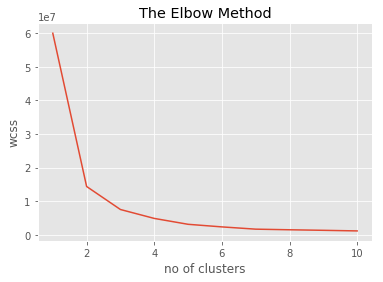

In [21]:
#Visualizing the ELBOW method to get the optimal value of K 
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

Taking the value of the elbow k = 2

In [22]:
# K means Clustering defining a function
def doKmeans(X, nclust=2):
    model = KMeans(nclust)
    model.fit(X)
    clust_labels = model.predict(X)
    cent = model.cluster_centers_
    return (clust_labels, cent)

clust_labels, cent = doKmeans(x, 2)
kmeans = pd.DataFrame(clust_labels)
x.insert((x.shape[1]),'kmeans',kmeans)

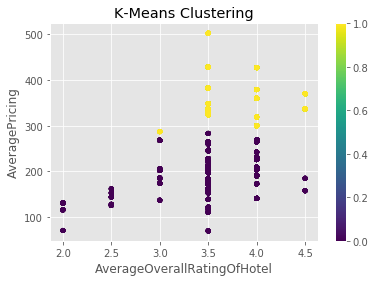

In [23]:
# Plotting the influence of rating and price on the clusters
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['AverageOverallRatingOfHotel'],x['AveragePricing'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('AverageOverallRatingOfHotel')
ax.set_ylabel('AveragePricing')
plt.colorbar(scatter)

The hotels with higher ratings have higher prices.Clearly one cluster has hotels charging high

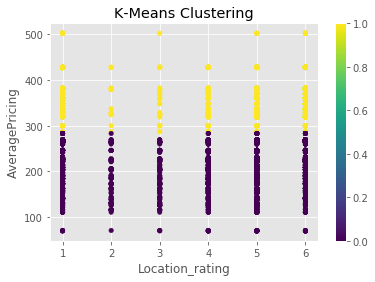

In [27]:
#Plot the clusters obtained using k means
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['Location_rating'],x['AveragePricing'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Location_rating')
ax.set_ylabel('AveragePricing')
plt.colorbar(scatter)

The location factor does not have any affect on the prices.

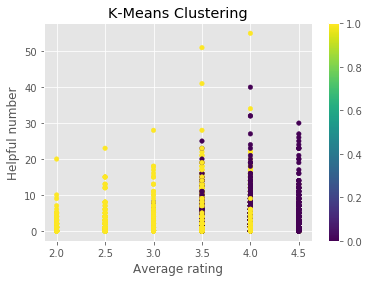

In [53]:
# Plotting the customers' reaction to the reviews according to the rating 
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['AverageOverallRatingOfHotel'],x['HelpfulToNoOfreaders'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Average rating')
ax.set_ylabel('Helpful number')
plt.colorbar(scatter)

 One cluster has high number of people for whom reviews were helpful especially for the hotels with low ratings

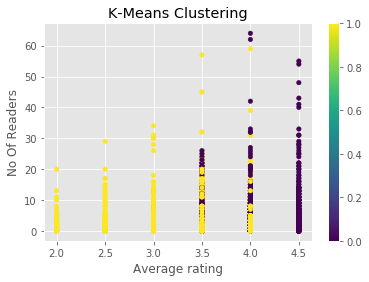

In [55]:
# Plotting the customers' interest in the reviews according to the rating 
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['AverageOverallRatingOfHotel'],x['NoOfReaders'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('Average rating')
ax.set_ylabel('No Of Readers')
plt.colorbar(scatter)

The readers in cluster 1 read reviews for hotels having ratings from 2 to 4.
The cluster 2 readers are limited to hotels having ratings from 3.5 to 4.5.

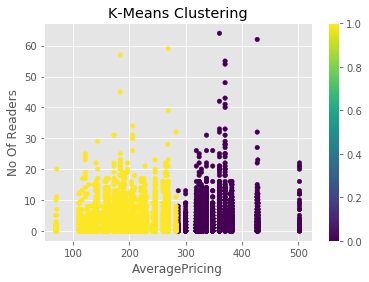

In [56]:
# Plotting the trends of customers' interest in hotels  
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['AveragePricing'],x['NoOfReaders'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('AveragePricing')
ax.set_ylabel('No Of Readers')
plt.colorbar(scatter)

Clearly the customers are clustered according to the reviews they read.People who spend upto 250 dollars do not read the review for the the expensive hotels. Price is a major deciding factor.  

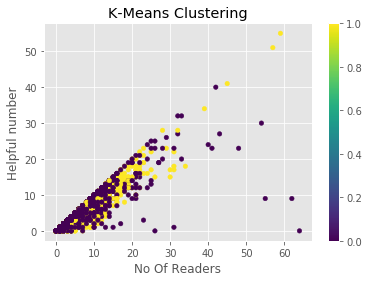

In [57]:
# Plotting the trends number of readers and to how many review was helpful in both clusters
fig = plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter(x['NoOfReaders'],x['HelpfulToNoOfreaders'],
                     c=kmeans[0],s=20)
ax.set_title('K-Means Clustering')
ax.set_xlabel('No Of Readers')
ax.set_ylabel('Helpful number')
plt.colorbar(scatter)

There is almost linear relaionship between number of readers and readers to whom the review was helpful.

### Recommendation System

In [283]:
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

In [284]:
from surprise import Dataset
from surprise import Reader, KNNWithMeans
from surprise.model_selection import cross_validate

In [285]:
# Reading new hotels customer data
cust_data = pd.read_csv('NewHotels_CutstomerVisitsdata-1554810098964.csv')
cust_data.head()

,Hotelid,userid,reviewtext,Date,NoOfReaders,HelpfulToNoOfreaders,Value_rating,Rooms_rating,Location_rating,Cleanliness_rating,Checkin_rating,Service_rating,Businessservice_rating,AverageOverallRatingOfHotel,AveragePricing
0,hotel_104,hotel_4342,Awesome Everything about this resort was great...,"Jan 5, 2009",0,0,6,6,6,6,6,6,6,4.0,$227
1,hotel_104,hotel_2024,Convenient When I say Above Average I'm compa...,"Nov 10, 2008",0,0,4,4,6,5,4,5,1,4.0,$227
2,hotel_104,hotel_8720,Nice with its quirks Beach looking west,"Nov 3, 2008",0,0,3,4,4,5,6,4,4,4.0,$227
3,hotel_104,hotel_3267,Always a 5 star stay! Its always a good trip w...,"Sep 30, 2008",0,0,6,6,6,6,6,6,6,4.0,$227
4,hotel_104,hotel_5419,Loved It! The hotel is beautiful with spectacu...,"Aug 29, 2008",3,2,6,4,6,6,6,6,6,4.0,$227


In [63]:
print(cust_data.shape)

(2469, 15)


In [64]:
# Reading rating data
rating_data = pd.read_csv('user_hotel_rating-1555730075105.csv')
rating_data.head()

,userid,Hotelid,OverallRating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2
2,user_78131,hotel_610,3
3,user_78131,hotel_574,3
4,user_78131,hotel_570,3


In [72]:
rating_data.describe()

,OverallRating
count,271935.000000
mean,3.257113
std,1.064767
min,1.000000
25%,3.000000
50%,3.000000
75%,4.000000
max,5.000000


In [65]:
print(rating_data.shape)

(271935, 3)


In [66]:
n_users = rating_data.userid.unique().shape[0]

In [67]:
n_users

5010

In [68]:
n_items = rating_data.Hotelid.unique().shape[0]

In [69]:
n_items

130

In [70]:
# Checking for the 1000th unque user id
rating_data.userid.unique()[:1000]

array(['user_78131', 'user_21002', 'user_24128', 'user_27174',
       'user_36448', 'user_44791', 'user_53199', 'user_58433',
       'user_62574', 'user_66567', 'user_68496', 'user_71452',
       'user_76546', 'user_76643', 'user_77336', 'user_78926',
       'user_79024', 'user_79636', 'user_79737', 'user_79840',
       'user_21936', 'user_23503', 'user_23609', 'user_24336',
       'user_25877', 'user_26571', 'user_27073', 'user_27374',
       'user_27463', 'user_27846', 'user_28046', 'user_29222',
       'user_29325', 'user_30079', 'user_30385', 'user_32392',
       'user_32497', 'user_33214', 'user_33635', 'user_34053',
       'user_34161', 'user_34375', 'user_34783', 'user_37165',
       'user_37476', 'user_38004', 'user_38422', 'user_39323',
       'user_40285', 'user_40813', 'user_42069', 'user_42485',
       'user_43213', 'user_43523', 'user_43739', 'user_44052',
       'user_44159', 'user_46028', 'user_46132', 'user_46240',
       'user_49197', 'user_50775', 'user_50879', 'user_

In [53]:
rating_data[rating_data.userid=='user_24420']

,userid,Hotelid,OverallRating
54495,user_24420,hotel_528,4
54496,user_24420,hotel_506,3
54497,user_24420,hotel_541,3
54498,user_24420,hotel_547,3
54499,user_24420,hotel_559,3
54500,user_24420,hotel_545,3
54501,user_24420,hotel_534,3
54502,user_24420,hotel_526,3
54503,user_24420,hotel_536,3
54504,user_24420,hotel_586,3


In [54]:
rating_data[:54552]

,userid,Hotelid,OverallRating
0,user_78131,hotel_558,3
1,user_78131,hotel_603,2
2,user_78131,hotel_610,3
3,user_78131,hotel_574,3
4,user_78131,hotel_570,3
5,user_78131,hotel_587,3
6,user_78131,hotel_593,4
7,user_78131,hotel_605,3
8,user_78131,hotel_559,4
9,user_78131,hotel_600,4


In [86]:
## Preparing data to make it compatible for "Surprise" Package
reader = Reader(line_format = 'user item rating', rating_scale=(1, 5))
## Reader is a function which returns a object compaitable with surprise package
data = Dataset.load_from_df(rating_data, reader)

In [87]:
print (type(reader))
print (type(data))

<class 'surprise.reader.Reader'>
<class 'surprise.dataset.DatasetAutoFolds'>


In [88]:
len(data.df)

271935

In [89]:
# Simulation Parameters

In [90]:
sim_parameters = {'name': 'cosine',
               'user_based': True 
               }
algo = KNNWithMeans(sim_options=sim_parameters)

In [91]:
# Cross Validation Accuracies

In [92]:
cross_validate(algo, data, measures=['RMSE', 'MAE'], cv=2, verbose=True)

Computing the cosine similarity matrix...
Done computing similarity matrix.
Computing the cosine similarity matrix...
Done computing similarity matrix.
Evaluating RMSE, MAE of algorithm KNNWithMeans on 2 split(s).

                  Fold 1  Fold 2  Mean    Std     
RMSE (testset)    0.8526  0.8548  0.8537  0.0011  
MAE (testset)     0.6450  0.6483  0.6467  0.0017  
Fit time          32.41   32.54   32.48   0.07    
Test time         111.37  112.27  111.82  0.45    


{'test_rmse': array([0.85256843, 0.8548349 ]),
 'test_mae': array([0.64497963, 0.64832649]),
 'fit_time': (32.40649652481079, 32.54395771026611),
 'test_time': (111.3665463924408, 112.26913857460022)}

In [93]:
# Training the model on complete data

In [94]:
# Using full data for training
trainset = data.build_full_trainset()
algo.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [96]:
# Filtering instances which can be used for predictions

In [97]:
# Getting data points where predictions can be made
testset = trainset.build_anti_testset()

In [98]:
print (type(testset))

<class 'list'>


In [99]:
print (len(testset))

379365


In [100]:
# Making Predictions

In [101]:
# Making predictions
predictions = algo.test(testset)

In [102]:
predictions[0:10]

[Prediction(uid='user_78131', iid='hotel_517', r_ui=3.2571129130123007, est=3.4281592285055904, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='user_78131', iid='hotel_519', r_ui=3.2571129130123007, est=3.4949691747245417, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='user_78131', iid='hotel_565', r_ui=3.2571129130123007, est=3.4966133305148115, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='user_78131', iid='hotel_630', r_ui=3.2571129130123007, est=3.589142088279805, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='user_78131', iid='hotel_601', r_ui=3.2571129130123007, est=3.54337927388582, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='user_78131', iid='hotel_604', r_ui=3.2571129130123007, est=3.3205005402016616, details={'actual_k': 40, 'was_impossible': False}),
 Prediction(uid='user_78131', iid='hotel_608', r_ui=3.2571129130123007, est=3.408920322056999, details={'actual_k':

In [ ]:
### Function to calculate top 10 predictions for each user

In [124]:
# Fetching top 10 predictions for each user
from collections import defaultdict
def get_top_n(predictions, n=10):
    
    # Mapping the predictions to each user.
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Sorting the predictions for each user and retrieve the k highest ones.
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

from itertools import islice

def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))


In [104]:
top_n = get_top_n(predictions, n=10)

In [105]:
type(top_n)

collections.defaultdict

In [125]:
top_n.items()

dict_items([('user_78131', [('hotel_630', 3.589142088279805), ('hotel_573', 3.5609953757896853), ('hotel_601', 3.54337927388582), ('hotel_512', 3.5113808519382204), ('hotel_507', 3.50875678078859), ('hotel_565', 3.4966133305148115), ('hotel_519', 3.4949691747245417), ('hotel_607', 3.4861356863531174), ('hotel_567', 3.485738582575398), ('hotel_550', 3.4842311902675247)]), ('user_21002', [('hotel_528', 3.6346117315204864), ('hotel_527', 3.58925931197994), ('hotel_567', 3.54411187176667), ('hotel_515', 3.5301943322731564), ('hotel_509', 3.5032372418807465), ('hotel_634', 3.5015937295752746), ('hotel_607', 3.498365146120741), ('hotel_507', 3.4661360288023206), ('hotel_621', 3.455072749300774), ('hotel_585', 3.451065280206906)]), ('user_24128', [('hotel_527', 2.961287200537698), ('hotel_507', 2.904069421088144), ('hotel_573', 2.839766109808672), ('hotel_570', 2.836393965766216), ('hotel_612', 2.8193247182078993), ('hotel_530', 2.803800499046789), ('hotel_528', 2.801012385557904), ('hotel_63

In [107]:
# Top Predictions Matrix

In [108]:
# Printing top predictions
for uid, user_ratings in take(10,top_n.items()):
    print(uid, [iid for (iid, _) in user_ratings])

user_78131 ['hotel_630', 'hotel_573', 'hotel_601', 'hotel_512', 'hotel_507', 'hotel_565', 'hotel_519', 'hotel_607', 'hotel_567', 'hotel_550']
user_21002 ['hotel_528', 'hotel_527', 'hotel_567', 'hotel_515', 'hotel_509', 'hotel_634', 'hotel_607', 'hotel_507', 'hotel_621', 'hotel_585']
user_24128 ['hotel_527', 'hotel_507', 'hotel_573', 'hotel_570', 'hotel_612', 'hotel_530', 'hotel_528', 'hotel_630', 'hotel_511', 'hotel_587']
user_27174 ['hotel_515', 'hotel_528', 'hotel_530', 'hotel_573', 'hotel_601', 'hotel_527', 'hotel_534', 'hotel_550', 'hotel_523', 'hotel_565']
user_36448 ['hotel_530', 'hotel_573', 'hotel_527', 'hotel_565', 'hotel_601', 'hotel_528', 'hotel_550', 'hotel_612', 'hotel_567', 'hotel_574']
user_44791 ['hotel_630', 'hotel_569', 'hotel_507', 'hotel_512', 'hotel_526', 'hotel_564', 'hotel_534', 'hotel_522', 'hotel_610', 'hotel_586']
user_53199 ['hotel_565', 'hotel_600', 'hotel_530', 'hotel_517', 'hotel_607', 'hotel_508', 'hotel_528', 'hotel_625', 'hotel_599', 'hotel_574']
user_5

## Conclusion

The lyrics from a song 'Hotel California' from the famous band Eagles,1977

"__Welcome to the Hotel California__

__Such a lovely place (such a lovely place)__

__Such a lovely face.__

__Plenty of room at the Hotel California__

__Any time of year (any time of year) you can find it here__"

In [ ]:
These lines roughly represent the sentiment what every customer would expect,
Their expectations can be met by  good hotel recomendation systems, which are 
trained on a very good sentiment analysis.The hotel management will rely on the 
analysis too for their business, services, profitability.

The text analysis was done on the train data with visualizations for good 
understanding of the problem.The python pakages of numpy, pandas, matplotlib,
were explored. The SPACY package was used for text analysis. The models 
well with bag of words. The clustering was done with Kmeans unsupervised 
algorithm,recommendations was built with surprise package.
Deep learning methods could have been explored  hardware limitations was not 
encouraging
Finally for the business we can take many 
 Understanding brand reputation related trend
 Comparing brand reputation to the competitor's for healthy business.
 Identify which aspects are damaging your reputation.
 Pinpointing which elements are boosting  brand reputation on online media.
 Identifing potential PR crises so you can deal with them ASAP.
 Advertising campaigning in media , social media can be carried.
 